<a href="https://colab.research.google.com/github/chad-fisher/CRWA-Regional-Tree-Planting-and-Protection-Plan/blob/main/CodeNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setup

In [1]:
#Import packages
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import fiona
import shapely
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as cx
import ee
import geemap
import geemap.foliumap as geemapf
import geetools
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling
import affine
import wget
import zipfile
import datetime
import pyinaturalist
from scipy import ndimage
import urllib
import rasterstats
import glob 
from geo_northarrow import add_north_arrow
import rioxarray
import xarray as xr
import pyogrio
import geocube
from geocube.vector import vectorize
import mapclassify
from pysal.model import spreg

In [2]:
#Authenticate to Earth Engine
ee.Authenticate()

<IPython.core.display.HTML object>

True

In [3]:
#Initialize earth engine project
ee.Initialize(project='ee-cefisher20')

<IPython.core.display.HTML object>

In [4]:
cd "C:\Users\Chad\Desktop\CRWA Project\CRWA-Regional-Tree-Planting-and-Protection-Plan\CRWA-Regional-Tree-Planting-and-Protection-Plan"

<IPython.core.display.HTML object>

C:\Users\Chad\Desktop\CRWA Project\CRWA-Regional-Tree-Planting-and-Protection-Plan\CRWA-Regional-Tree-Planting-and-Protection-Plan


# Downloading data

In [ ]:
#UMASS CAPS data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://landeco.umass.edu/web/masscaps/standard.zip"
zipfile.ZipFile('C:/Users/Chad/Desktop/CRWA Project/Raw_Data/standard.zip').extractall(path='C:/Users/Chad/Desktop/CRWA Project/Raw_Data/standard/')

In [ ]:
#MASSGIS SSURGO data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/Soils_MassGIS_SHP.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Soils_MassGIS_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Soils_MassGIS_SHP/")

In [ ]:
#MASSGIS Watershed data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/watshd.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/watshd.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/watshd/")

In [ ]:
#MASSGIS Municipalities Data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/CENSUS2020TOWNS_SHP.zip"
zipfile.ZipFile("C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020TOWNS_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CENSUS2020TOWNS_SHP/")

In [ ]:
#Analyze Boston NBHDS data
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/6505e8fc489b48cc848abeccc6e87b79/shapefile?layers=0"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Boston_Neighborhood_Boundaries_Approximated_by_2020_Census_Block_Groups.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Boston NBHDS/")

In [ ]:
#EJ Populations
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/census2020/ej2020.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\ej2020.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/EJ Data/")

In [ ]:
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/dataforgood-fb-data/forests/v1/models/data.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\data.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/METAWRICanopy/")

In [ ]:
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/hydro25k.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\hydro25k.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Hydro/")

In [ ]:
#https://mapc.sharefile.com/share/view/s981467b33e8948e2bcd167d1399c6069
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MAPC_LST.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Heat/")

In [ ]:
#CSO data provided by Juliet Swigor at MassDEP
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\CSO_exportApril2024.gdb.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/CSO/")

In [ ]:
#Protected and Recreational Open Space
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/openspace.zip"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\openspace.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/OpenSpace/")

In [ ]:
!python -m wget -o "C:/Users/Chad/Desktop/CRWA Project/Raw_Data" "https://datacommon.mapc.org/shapefile?table=gisdata.mapc.ma_parcels_metrofuture&database=gisdata"
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\export-gisdata.mapc.ma_parcels_metrofuture.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/ParcelData/")
gpd.read_file('../../Raw_Data/ParcelData/export-gisdata.mapc.ma_parcels_metrofuture.shp',driver='pyogrio').clip(CRW).to_file('../../Working_Data/Parcels_Clipped.shp')

In [ ]:
#Data from https://hub.arcgis.com/datasets/fedmaps::u-s-electric-power-transmission-lines/explore?location=42.022428%2C-69.930668%2C7.57
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\US_Electric_Power_Transmission_Lines_-7015907722120939242.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Transmission Lines/")

In [ ]:
#Data from https://atlas.eia.gov/datasets/eia::natural-gas-interstate-and-intrastate-pipelines/explore?location=41.877655%2C-71.274422%2C8.40
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\NaturalGas_InterIntrastate_Pipelines_US_EIA_-5437104712952757797.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Gas Lines/")

In [ ]:
# TNC conservation priority data from Dira Johanif at CRWA
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\MA_CharlesRiver)NBS_11.07.gdb.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\High Level Conservation Opp-20240524T191644Z-001.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Conservation Opp (Unprotected and Undeveloped Areas)-20240524T191643Z-001.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/TNC_Cons/")
cons_opp=glob.glob(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\High Level Conservation Opp\*")
high_cons_opp=glob.glob(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\Conservation Opp (Unprotected and Undeveloped Areas)\*")
for fp in cons_opp:
    zipfile.ZipFile(fp).extractall(path=r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\High Level Conservation Opp")
for fp in high_cons_opp:
    zipfile.ZipFile(fp).extractall(path=r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\TNC_Cons\Conservation Opp (Unprotected and Undeveloped Areas)")

In [ ]:
# Requested statewide parcel data from MASSGIS https://www.mass.gov/info-details/massgis-data-property-tax-parcels
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Statewide_parcels_SHP.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/ParcelData/")

# Miscellaneous tools

In [291]:
#Extracting hex codes from matplotlib color maps
colors = my_greens.resampled(4)
for i in range(0,4):
    print(mpl.colors.to_hex(colors(i)))

<IPython.core.display.HTML object>

#f7fcf5
#9bb686
#498643
#006d2c


# Extracting watershed boundaries

In [5]:
rivers=gpd.read_file('../../Raw_Data/Hydro/HYDRO25K_POLY.shp',driver='pyogrio')

<IPython.core.display.HTML object>

In [6]:
Charles=rivers[rivers['NAME']=='Charles River'].to_crs(epsg=26986)

<IPython.core.display.HTML object>

In [7]:
CRW=gpd.read_file("../../Raw_Data/CRW_Boundary/CRW_Boundary/CRW_Boundary.shp",driver='pyrogio')

<IPython.core.display.HTML object>

In [8]:
# Read in towns SHP and clip/dissolve polygons 
towns=gpd.read_file("../../Raw_Data/CENSUS2020TOWNS_SHP/CENSUS2020TOWNS_POLY.shp").to_crs(CRW.crs).clip(CRW)
Charles_Towns=towns.to_crs(epsg=26986).dissolve('NAMELSAD20')
Charles_Towns['name']=Charles_Towns.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [9]:
# Upper, middle, and lower wateshed
Upper=['Milford', 'Hopkinton', 'Bellingham', 'Franklin', 'Wrentham', 'Medway', 'Holliston', 'Norfolk', 'Hopedale', 'Millis', 'Medfield']
Middle=['Sherborn', 'Dover', 'Natick', 'Needham', 'Wellesley', 'Westwood', 'Dedham','Weston', 'Waltham']
Lower=['Newton', 'Brookline', 'Boston', 'Cambridge', 'Somerville', 'Watertown']
CRW_Upper=Charles_Towns[np.isin(Charles_Towns['name'],Upper)]
CRW_Middle=Charles_Towns[np.isin(Charles_Towns['name'],Middle)]
CRW_Lower=Charles_Towns[np.isin(Charles_Towns['name'],Lower)]

<IPython.core.display.HTML object>

In [10]:
Upper_extent=[CRW_Upper.dissolve().geometry.bounds['minx'][0],CRW_Upper.dissolve().geometry.bounds['maxx'][0],CRW_Upper.dissolve().geometry.bounds['miny'][0],CRW_Upper.dissolve().geometry.bounds['maxy'][0]]
Middle_extent=[CRW_Middle.dissolve().geometry.bounds['minx'][0],CRW_Middle.dissolve().geometry.bounds['maxx'][0],CRW_Middle.dissolve().geometry.bounds['miny'][0],CRW_Middle.dissolve().geometry.bounds['maxy'][0]]
Lower_extent=[CRW_Lower.dissolve().geometry.bounds['minx'][0],CRW_Lower.dissolve().geometry.bounds['maxx'][0],CRW_Lower.dissolve().geometry.bounds['miny'][0],CRW_Lower.dissolve().geometry.bounds['maxy'][0]]

<IPython.core.display.HTML object>

# Tree Canopy

In [ ]:
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    img=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_'+year).clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
    geemap.ee_export_image(img,filename='../../Working_Data/TCC'+year+'.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

In [ ]:
canStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC"+'2008'+".tif",stats="count min mean max median"),index=Charles_Towns.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC"+year+".tif",stats="count min mean max median"),index=Charles_Towns.index)
    canStats=canStats.join(stats,on=Charles_Towns.index,rsuffix=year)
canStats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/AverageCanopy.csv')

In [ ]:
CanData['Year'][0][-4:]

In [ ]:
CanData=pd.read_csv('../../Working_Data/AverageCanopy.csv')
CanData=pd.melt(CanData,id_vars='NAMELSAD20',var_name='Year')
for i in CanData.index:
    CanData['Year'].iloc[i]=CanData['Year'].iloc[i][-4:]

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(CanData,x='Year',y='value',hue='NAMELSAD20',ax=ax,legend=True)
ax.set_ylabel('Canopy Coverage (%)')
ax.set_xlabel('Year')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.savefig('Output Maps/Canopy time series',dpi=300,transparent=True,bbox_inches='tight')

In [ ]:
TCC2021=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_2021').clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
TCC2008=ee.Image('USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4/TCC_v2021-4_CONUS_2008').clip(geemap.geopandas_to_ee(CRW)).select('Science_Percent_Tree_Canopy_Cover').reproject(crs='EPSG:26986',scale=30)
dtreeCover=TCC2021.subtract(TCC2008)
dtreeCover=geemap.ee_export_image(dtreeCover, filename='../../Working_Data/dTCC08_21.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

In [134]:
TCC2021,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2021_M,trans=mask(rio.open('../../Working_Data/TCC2021.tif'),CRW_Middle.to_crs(epsg=26986).geometry,crop=True,filled=False)
TCC2008,trans=mask(rio.open('../../Working_Data/TCC2008.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
dTCC,trans=mask(rio.open('../../Working_Data/dTCC08_21.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
dTCC_M,trans=mask(rio.open('../../Working_Data/dTCC08_21.tif'),CRW_Middle.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/TCC2021.tif'))

<IPython.core.display.HTML object>

In [135]:
# Calculate zonal statistics, join back onto town data frame and extract town name
canStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Charles_Towns.index)
canStats=canStats.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
canStats['name']=canStats.index.str.split(' ').str[0]

<IPython.core.display.HTML object>

In [136]:
# Sort by mean tree canopy percent change
canStats=canStats.sort_values(by='mean')

<IPython.core.display.HTML object>

In [137]:
# Generate coordinates for labeling polygons on maps
canStats['coords'] = canStats['geometry'].apply(lambda x: x.representative_point().coords[:])
canStats['coords'] = [coords[0] for coords in canStats['coords']]

<IPython.core.display.HTML object>

In [138]:
canStats['mean'].mean()

<IPython.core.display.HTML object>

52.862092368405136

In [290]:
colors7=['#f7fcf5','#6d934f','#006d2c'] 
my_greens = mpl.colors.LinearSegmentedColormap.from_list('my_cmap7',colors7,N=256)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

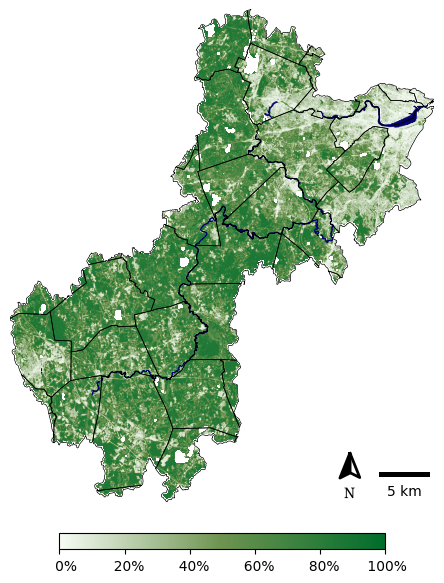

In [156]:
f, ax = plt.subplots(figsize=(6,8))

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(TCC2021[0,:,:],cmap=my_greens,extent=plot_extent,alpha=1,vmin=0,vmax=100)
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')

# Add data and layers
show(TCC2021,cmap=my_greens,ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')
#plt.title('2021 Canopy Coverage')
#plt.text(-7.965e6,5.16e6,'Source: USFS Tree Canopy Coverage from Google Earth Engine',fontsize=8)


# Add colorbar using hidden version of raster
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)
f.savefig('Output Maps/2021 TCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
f, ax = plt.subplots(figsize=(6,8))

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(TCC2021[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')

# Add data and layers
show(TCC2021,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW_Middle).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')
#plt.title('2021 Canopy Coverage')
#plt.text(-7.965e6,5.16e6,'Source: USFS Tree Canopy Coverage from Google Earth Engine',fontsize=8)


# Add colorbar using hidden version of raster
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.95,xlim_pos=0.95,text_scaler=4, text_yT=-3)
ax.add_artist(ScaleBar(1,location='lower right'))
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)
f.savefig('Output Maps/2021 TCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

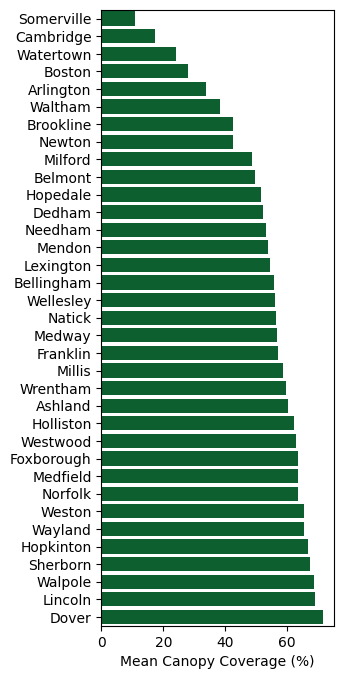

In [157]:
# Add barplot, set properties, and change colors
fig,ax=plt.subplots(figsize=(3, 8))
bar_plot=sns.barplot(canStats,ax=ax,x='mean',y='name',orient='h',width=0.8,color='#006d2c')
ax.set(ylabel=None,xlabel='Mean Canopy Coverage (%)')
fig.savefig('Output Maps/2021 Canopy graph for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
f, ax = plt.subplots(figsize=(6,8))

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(TCC2008[0,:,:],cmap='Greens',extent=plot_extent,alpha=1,vmin=0,vmax=100)
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')

# Add data and layers
show(TCC2008,cmap='Greens',ax=ax,extent=plot_extent,alpha=1,vmin=0,vmax=100)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)

ax.axis('off')
plt.title('2008 Canopy Coverage')
#plt.text(-7.965e6,5.16e6,'Source: USFS Tree Canopy Coverage from Google Earth Engine',fontsize=8)


# Add colorbar using hidden version of raster
f.colorbar(hidden,format='%4i%%',orientation='horizontal',shrink=0.5,aspect=10,pad=0.1)
f.savefig('Output Maps/2008 TCC.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# List of names of towns participating in the climate compact from https://www.crwa.org/climate-compact
CC_Towns=['Arlington', 'Bellingham', 'Belmont', 'Boston', 'Brookline', 'Cambridge', 'Dedham', 'Dover', 'Franklin', 'Holliston', 'Hopkinton', 'Lincoln', 'Medfield', 'Medway', 'Millis', 'Natick', 'Needham', 'Newton', 'Norfolk', 'Sherborn', 'Somerville', 'Walpole', 'Waltham', 'Watertown', 'Wellesley', 'Weston', 'Westwood', 'Wrentham']

In [ ]:
CC_CRW=Charles_Towns.loc[Charles_Towns['name'].isin(CC_Towns)]

In [ ]:
dTCC_CC,trans=mask(rio.open('../../Working_Data/dTCC08_21.tif'),CC_CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

In [ ]:
# Calculate zonal statistics, join back onto town data frame and extract town name
townStats=pd.DataFrame(rasterstats.zonal_stats(Charles_Towns, "../../Working_Data/dTCC08_21.tif",stats="count min mean max median"),index=Charles_Towns.index)
townStats=townStats.merge(Charles_Towns.to_crs(epsg=26986),left_index=True,right_index=True)
townStats['name']=townStats.index.str.split(' ').str[0]

In [ ]:
# Sort by mean tree canopy percent change
townStats=townStats.sort_values(by='mean')

In [ ]:
# Generate coordinates for labeling polygons on maps
townStats['coords'] = townStats['geometry'].apply(lambda x: x.representative_point().coords[:])
townStats['coords'] = [coords[0] for coords in townStats['coords']]

In [ ]:
# Extract only Climate Compact towns
townStatsCC=townStats.loc[townStats['name'].isin(CC_Towns)]
townStatsCC.to_csv('../../Working_Data/Town Canopy Stats.csv')

In [ ]:
for i in np.arange(0,27):
    if np.isin(townStatsCC['name'].iloc[i],Upper):
        townStatsCC['division'].iloc[i]='U'
    elif np.isin(townStatsCC['name'].iloc[i],UMiddle):
        townStatsCC['division'].iloc[i]='UM'
    elif np.isin(townStatsCC['name'].iloc[i],LMiddle):
        townStatsCC['division'].iloc[i]='LM'
    elif np.isin(townStatsCC['name'].iloc[i],Lower):
        townStatsCC['division'].iloc[i]='L'

In [ ]:
townStatsCC['mean'].mean()

In [ ]:
# Create subplots
f, ax = plt.subplots(figsize=(6,8))
f.tight_layout()

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(dTCC_M[0,:,:],cmap='BrBG',extent=Middle_extent,alpha=1,vmin=-100,vmax=100)

# Add data and layers
show(dTCC_M,cmap='BrBG',ax=ax,extent=Middle_extent,alpha=1,vmin=-50,vmax=50)
CRW_Middle.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.clip(CRW_Middle).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)

# Add colorbar using hidden version of raster
#f.colorbar(hidden, cmap='BrBG',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Change in tree cover (percentage points)',format="%4i")

# Set properties of plot
#ax[0].set(title='Tree Cover Change (2008 - 2021) in the Charles River Watershed')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.set_axis_off()
#add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.95,xlim_pos=0.95,text_scaler=4, text_yT=-3)
f.savefig('Output Maps/dTCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

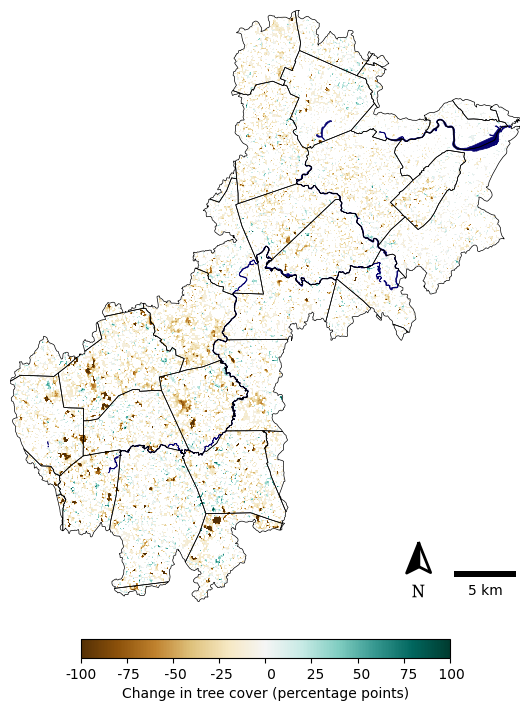

In [171]:
# Create subplots
f, ax = plt.subplots(figsize=(6,8))
f.tight_layout()

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(dTCC[0,:,:],cmap='BrBG',extent=plot_extent,alpha=1,vmin=-100,vmax=100)

# Add data and layers
show(dTCC,cmap='BrBG',ax=ax,extent=plot_extent,alpha=1,vmin=-50,vmax=50)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)

# Add colorbar using hidden version of raster
f.colorbar(hidden, cmap='BrBG',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Change in tree cover (percentage points)',format="%4i")

# Set properties of plot
#ax[0].set(title='Tree Cover Change (2008 - 2021) in the Charles River Watershed')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.set_axis_off()
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
f.savefig('Output Maps/dTCC for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# Create subplots
f, ax = plt.subplots(figsize=(6,8))
f.tight_layout()

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(dTCC_CC[0,:,:],cmap='BrBG',extent=plot_extent,alpha=1,vmin=-100,vmax=100)

# Add data and layers
show(dTCC_CC,cmap='BrBG',ax=ax,extent=plot_extent,alpha=1,vmin=-50,vmax=50)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.1)
CC_CRW.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
# Add colorbar using hidden version of raster
#f.colorbar(hidden, cmap='BrBG',orientation='vertical',aspect=10,shrink=0.4,pad=.04,label='Change in tree cover (percentage points)',format="%4i")

# Set properties of plot
#ax[0].set(title='Tree Cover Change (2008 - 2021) in the Charles River Watershed')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.set_axis_off()
f.savefig('Output Maps/dTCC CC.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# Add barplot, set properties, and change colors
fig,ax=plt.subplots(figsize=(3, 8))
bar_plot=sns.barplot(townStats,ax=ax,x='mean',y='name',orient='h',width=0.8,color='green')
ax.set(ylabel=None,xlabel='Change (percentage points)')
for p in bar_plot.patches:
    if p.get_width() < 0:
        p.set_color('#bf812d')
    else:
        p.set_color('#35978f')
fig.savefig('Output Maps/dTCC graph for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# Add barplot, set properties, and change colors
fig,ax=plt.subplots(figsize=(3, 8))
bar_plot=sns.barplot(townStatsCC,ax=ax,x='mean',y='name',orient='h',width=0.8,color='green')
ax.set(ylabel=None,xlabel='Change (percentage points)')
for p in bar_plot.patches:
    if p.get_width() < 0:
        p.set_color('#bf812d')
    else:
        p.set_color('#35978f')
fig.savefig('Output Maps/dTCC CC graph.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# Plot tree cover change

# Create subplots
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7),gridspec_kw={'width_ratios': [3, 1]})
f.tight_layout()

# Create hidden version of raster to be used for color bar
hidden = ax[0].imshow(dTCC[0,:,:],cmap='BrBG',extent=plot_extent,alpha=1,vmin=-100,vmax=100)

# Add data and layers
show(dTCC,cmap='BrBG',ax=ax[0],extent=plot_extent,alpha=1,vmin=-50,vmax=50)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)

# Add colorbar using hidden version of raster
f.colorbar(hidden, cmap='BrBG',orientation='horizontal',aspect=10,shrink=0.4,pad=.04,label='Change in tree cover (percentage points)',format="%4i")

# Set properties of plot
ax[0].set(title='Tree Cover Change (2008 - 2021) in the Charles River Watershed')
ax[0].add_artist(ScaleBar(1,location='lower right'))
ax[0].set_axis_off()

# Add barplot, set properties, and change colors
bar_plot=sns.barplot(townStats,ax=ax[1],x='mean',y='name',orient='h',width=0.8)
ax[1].set(ylabel=None,xlabel='Mean Change (percentage points)')
for p in bar_plot.patches:
    if p.get_width() < 0:
        p.set_color('#bf812d')
    else:
        p.set_color('#35978f')

# Save figure 
f.savefig("Output Maps/Tree Cover Change (2008 - 2021) in the Charles River Watershed.png",bbox_inches=mpl.transforms.Bbox.from_bounds(1.2,-0.1,11,7.5))

In [ ]:
# Plot tree cover change

# Create subplots
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7),gridspec_kw={'width_ratios': [3, 1]})
f.tight_layout()

# Create hidden version of raster to be used for color bar
hidden = ax[0].imshow(dTCC[0,:,:],cmap='BrBG',extent=plot_extent,alpha=1,vmin=-50,vmax=50)

# Add data and layers
show(dTCC,cmap='BrBG',ax=ax[0],extent=plot_extent,alpha=1,vmin=-50,vmax=50)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)


# Label towns
townStatsCC[townStatsCC['count']>200].apply(lambda x: ax[0].annotate(text=x['name'], xy=x['coords'], ha='center'), axis=1)

# Add colorbar using hidden version of raster
f.colorbar(hidden, cmap='BrBG',orientation='horizontal',aspect=25,shrink=0.7,pad=.04,label='Percent change in tree cover',format="%4i%%")

# Set properties of plot
ax[0].set(title='Tree Cover Change (2005 - 2020) in the Charles River Watershed')
ax[0].add_artist(ScaleBar(1,location='lower right'))
ax[0].set_axis_off()
plt.text(-21,28,'Source: Tree cover change was calculated from MODIS vegetation continuous \nfields available from Google Earth Engine',fontsize=8)

# Add barplot, set properties, and change colors
bar_plot=sns.barplot(townStatsCC,ax=ax[1],x='mean',y='name',orient='h',width=0.8)
ax[1].set(ylabel=None,xlabel='Mean Change (%)')
for p in bar_plot.patches:
    if p.get_width() < 0:
        p.set_color('#bf812d')
    else:
        p.set_color('#35978f')

# Save figure 
f.savefig("Output Maps/Climate Compact Towns Tree Cover Change (2005 - 2020) in the Charles River Watershed.png",bbox_inches=mpl.transforms.Bbox.from_bounds(1.2,-0.1,11,7.5))

In [ ]:
ResultsbyDivision=townStatsCC.groupby('division')['mean'].mean()
ax=sns.barplot(ResultsbyDivision,order=['U','UM','LM','L'])
ax.set(xlabel='Subwatershed',ylabel='Mean Change in Canopy (%)')
j=0
colors=['blue','green','red','purple']
for p in ax.patches:
    p.set_color(colors[j])
    j+=1
plt.title('Change in Canopy (2005 - 2020) by Subwatershed')
plt.show()

# Soils Maps

In [11]:
#Import soils data and clip to boundaries
Ag_soils = gpd.clip(gpd.read_file("../../Raw_Data/Soils_MassGIS_SHP/SOILS_POLY_PRIMEFARMLAND.shp",mask=CRW.to_crs('EPSG:26986')),CRW.to_crs('EPSG:26986'))
Soils = gpd.clip(gpd.read_file("../../Raw_Data/Soils_MassGIS_SHP/SOILS_MUPOLYGON_TOP20.shp",mask=CRW.to_crs('EPSG:26986')),CRW.to_crs('EPSG:26986'))
Soils.to_file('../../Working_Data/SoilsCRW.shp')  

<IPython.core.display.HTML object>

In [297]:
OWN_palette = {'No':'#f6ecd1','Unranked':'#e5e5e5','Yes':'#5bb2a8'}
OWN_cmap = mpl.colors.ListedColormap([OWN_palette[b] for b in ['No','Unranked','Yes']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

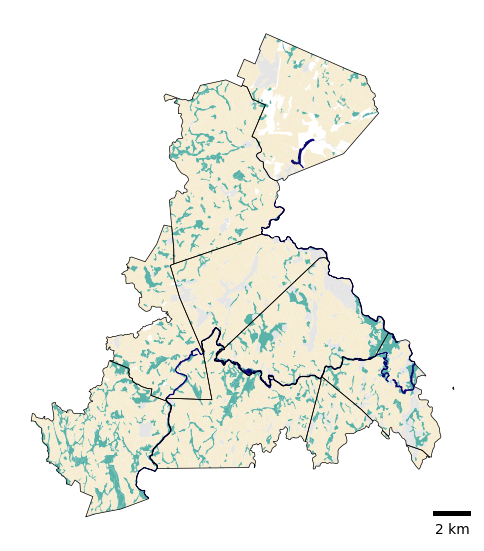

In [298]:
fig,ax=plt.subplots(figsize=(6,8))
Soils.clip(CRW_Middle).plot(ax=ax,column='HYDRCRATNG',cmap=OWN_cmap,legend=False,legend_kwds={'loc':'upper left'})
CRW_Middle.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
#plt.title('Hydric Soil Rating')
Charles.clip(CRW_Middle).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
ax.axis('off')
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
fig.savefig('Output Maps/Hydric rating for publication.png',transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

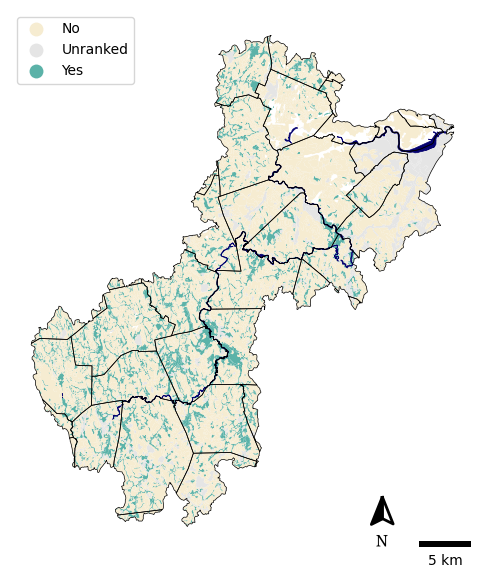

In [300]:
fig,ax=plt.subplots(figsize=(6,8))
Soils.plot(ax=ax,column='HYDRCRATNG',cmap=OWN_cmap,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
#plt.title('Hydric Soil Rating')
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
ax.axis('off')
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/Hydric rating for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
#Slope map
ax=Soils.to_crs(epsg=26986).plot(column='SLOPE_1',cmap='YlOrBr',legend=True,legend_kwds={'format':"%4i%%",'aspect': 25,'shrink': 0.8,'pad': 0.04},figsize=(10,10))
CRW.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
plt.title("Slope in the Charles River Watershed")
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
plt.text(-7.968e6,5.157e6,'Source: SSURGO data accessed from MassGIS',fontsize=8)
plt.savefig("Output Maps/SlopeCRW.png",dpi=300,bbox_inches='tight')

In [16]:
#(because geopandas doesn't allow you to change sort of a categorical class and defaults to alphabetical,
#I had to recode category)
drain_recode={
    'Excessively drained': 'A',
    'Somewhat excessively drained': 'B',
    'Well drained': 'C',
    'Moderately well drained': 'D',
    'Poorly drained': 'E',
    'Very poorly drained': 'F'
}
Soils['Drain_Code']=Soils['DRAINCLASS'].map(drain_recode)

<IPython.core.display.HTML object>

In [28]:
colors5=['#dab972','#e5e5e5','#5bb2a8'] 
my_cmap5 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap5',colors5,N=6)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

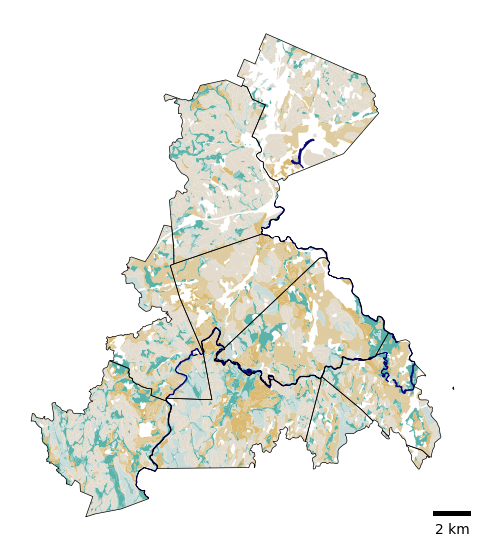

In [32]:
#Soil drainage map
fig, ax=plt.subplots(1,2,figsize=(6,8))
Soils.clip(CRW_Middle).to_crs(epsg=26986).plot(ax=ax,column='Drain_Code',cmap=my_cmap5,legend=False,legend_kwds={'loc':'upper left','fontsize':8,'framealpha':1})
#leg1 = ax.get_legend()
#new_legtxt = ['Excessively drained','Somewhat excessively drained','Well drained','Somewhat well drained','Poorly drained',
#              'Very poorly drained','No Data']

#Fixing legend entries
#for ix,eb in enumerate(leg1.get_texts()):
#    eb.set_text(new_legtxt[ix])
#    eb.set_size(fontsize=6.5)

CRW_Middle.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
#plt.title("Soil Drainage in the Charles River Watershed")
Charles.clip(CRW_Middle).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
ax.set_axis_off()
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
plt.savefig("Output Maps/Drainage for publication.png",transparent=True,dpi=300,bbox_inches='tight')

<IPython.core.display.HTML object>

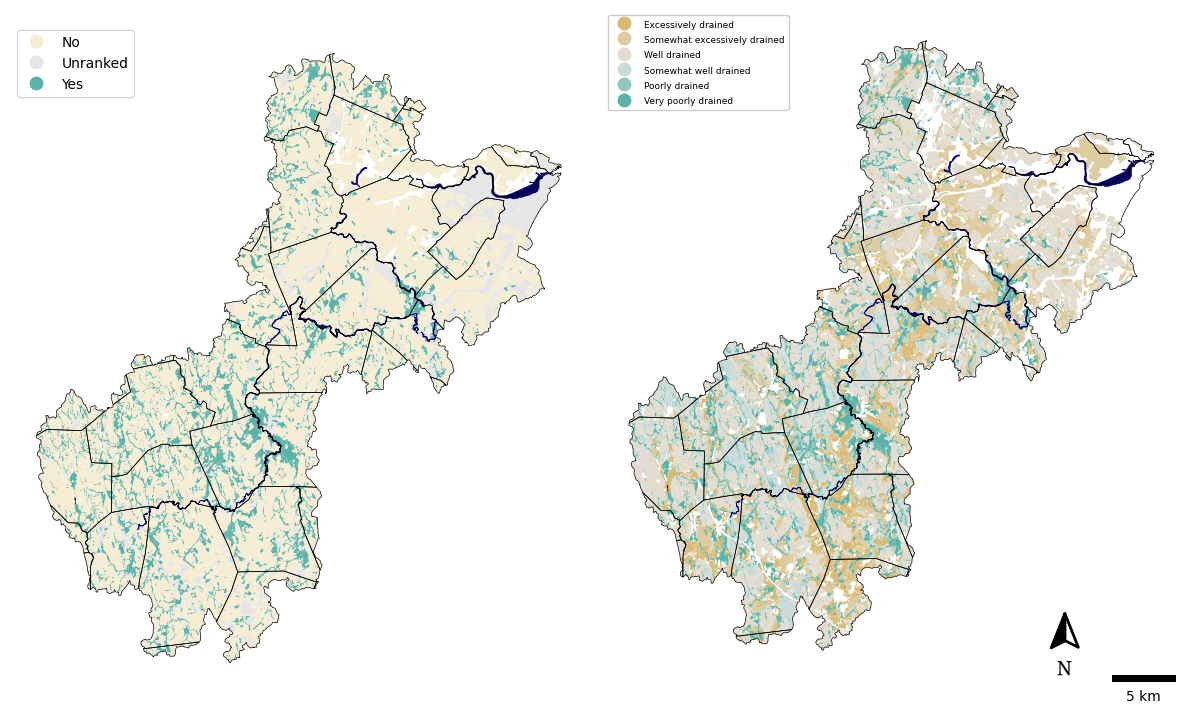

In [311]:
#Soil drainage map
fig, ax=plt.subplots(1,2,figsize=(12,8),width_ratios=[1,1],layout='tight')

Soils.plot(ax=ax[0],column='HYDRCRATNG',cmap=OWN_cmap,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='black',linewidth=0.5)
#plt.title('Hydric Soil Rating')
Charles.plot(ax=ax[0],color='#060270',edgecolor='#060270',linewidth=0.5)
#ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
ax[0].axis('off')
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
#add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)



Soils.to_crs(epsg=26986).plot(ax=ax[1],column='Drain_Code',cmap=my_cmap5,legend=True,legend_kwds={'loc':'upper left','fontsize':8,'framealpha':1})
leg1 = ax[1].get_legend()
new_legtxt = ['Excessively drained','Somewhat excessively drained','Well drained','Somewhat well drained','Poorly drained',
              'Very poorly drained','No Data']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
    eb.set_size(fontsize=6.5)

towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='black',linewidth=0.5)
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
#plt.title("Soil Drainage in the Charles River Watershed")
Charles.plot(ax=ax[1],color='#060270',edgecolor='#060270',linewidth=0.5)
ax[1].add_artist(ScaleBar(1,location='lower right'))
ax[1].set_axis_off()
add_north_arrow(ax=ax[1],scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
plt.savefig("Output Maps/Hydric and Drainage for publication.png",transparent=True,dpi=300,bbox_inches='tight')

# EJ Pops

In [220]:
EJPops=gpd.read_file('../../Raw_Data/EJ Data/EJ_POLY.shp',driver='pyogrio').clip(CRW)

<IPython.core.display.HTML object>

In [221]:
EJpops=EJPops.dissolve('EJ_CRITE_1')

<IPython.core.display.HTML object>

In [222]:
EJStats=pd.DataFrame(rasterstats.zonal_stats(EJpops, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=EJpops.index)
EJStats

<IPython.core.display.HTML object>

min   max       mean   count  median
EJ_CRITE_1                                      
1           1.0  98.0  37.690166  162742    28.0
2           1.0  92.0  17.658578   16689    12.0
3           1.0  85.0  12.390785    3603     8.0

In [223]:
CRWStats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC2021.tif",stats="count min mean max median"))
CRWStats

<IPython.core.display.HTML object>

min   max       mean   count  median
0  1.0  98.0  53.692368  886934    60.0

<IPython.core.display.HTML object>

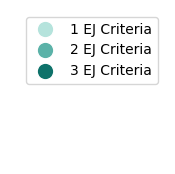

In [224]:
fig,ax=plt.subplots(figsize=(2,2))
l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#b5e3dc', marker='o',markersize=12, label='1 EJ Criteria')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', marker='o',markersize=12, label='2 EJ Criteria')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='o',markersize=12, label='3 EJ Criteria')

ax.axis('off')
ax.legend(handles=[l1,l2,l3])
fig.savefig('Output Maps/EJ Legend.png',dpi=300,transparent=True,bbox_inches='tight')

<IPython.core.display.HTML object>

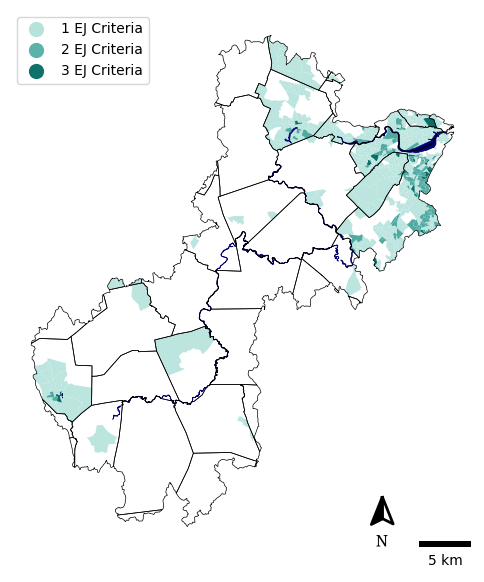

In [247]:
fig,ax=plt.subplots(figsize=(6,8))
EJPops.plot(ax=ax,column='EJ_CRITE_1',cmap='BrBG',legend=False,norm=mpl.colors.BoundaryNorm(np.linspace(-4, 4, 36),ncolors=256),vmin=1,vmax=3)
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
#plt.title('Environmental Justice Populations (2020)')
ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')

l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#b5e3dc', marker='o',markersize=12, label='1 EJ Criteria')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', marker='o',markersize=12, label='2 EJ Criteria')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='o',markersize=12, label='3 EJ Criteria')

ax.axis('off')
ax.legend(handles=[l1,l2,l3],loc='upper left')
fig.savefig('Output Maps/EJ Legend.png',dpi=300,transparent=True,bbox_inches='tight')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.axis('off')
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
fig.savefig('Output Maps/EJ Pops for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
EJPops.plot(ax=ax,column='EJ_CRITE_1',cmap='BrBG',legend=False,norm=mpl.colors.BoundaryNorm(np.linspace(-4, 4, 36),ncolors=256),vmin=1,vmax=3)
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
#plt.title('Environmental Justice Populations (2020)')
ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')

l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#b5e3dc', marker='o',markersize=12, label='1 EJ Criteria')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5bb2a8', marker='o',markersize=12, label='2 EJ Criteria')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#0e726a', marker='o',markersize=12, label='3 EJ Criteria')

ax.axis('off')
ax.legend(handles=[l1,l2,l3],loc='upper left')
fig.savefig('Output Maps/EJ Legend.png',dpi=300,transparent=True,bbox_inches='tight')
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/EJ Pops for publication.png',transparent=True,dpi=300,bbox_inches='tight')

# Development Pressure

In [ ]:
# https://www.mass.gov/doc/healthy-soils-action-plan-2023/download and New England Landscape Futures data from Harvard forest

In [ ]:
scenarios=glob.glob('../../Raw_Data/NELF/*.tif')
dst_crs = 'EPSG:26986'
for fp in scenarios:
    with rio.open(fp) as src:
    
        transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
            with rio.open(fp[:-4]+'Reprojected.tif', 'w', **kwargs) as dst:
                for i in range(1, src.count + 1):
                    reproject(
                        source=rio.band(src, i),
                        destination=rio.band(dst, i),
                        src_transform=src.transform,
                        src_crs=src.crs,
                        dst_transform=transform,
                        dst_crs=dst_crs,
                        resampling=Resampling.nearest)

In [ ]:
scenarios=glob.glob('../../Raw_Data/NELF/*01Reprojected.tif')
CC20,trans=mask(rio.open('../../Raw_Data/NELF/cc_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GA20,trans=mask(rio.open('../../Raw_Data/NELF/ga_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GG20,trans=mask(rio.open('../../Raw_Data/NELF/gg_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
RT20,trans=mask(rio.open('../../Raw_Data/NELF/rt_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
YC20,trans=mask(rio.open('../../Raw_Data/NELF/yc_01Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

In [ ]:
scenarios=glob.glob('../../Raw_Data/NELF/*05Reprojected.tif')
CC60,trans=mask(rio.open('../../Raw_Data/NELF/cc_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GA60,trans=mask(rio.open('../../Raw_Data/NELF/ga_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
GG60,trans=mask(rio.open('../../Raw_Data/NELF/gg_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
RT60,trans=mask(rio.open('../../Raw_Data/NELF/rt_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
YC60,trans=mask(rio.open('../../Raw_Data/NELF/yc_05Reprojected.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)

Key for coding in NELF data: 
1: High Density Development
2: Low Density Development
3: Unprotected Forest
4: Conserved Forest
5: Agriculture
6: Other
7: Water

In [ ]:
NELF_codes=[1,2,3,4,5,6,7]
NELF_colors=['#730000','#E60000','#ABCD66','#5C8944','#FFDE59','#CCCCCC','#00A9E6']
NELF_cmap = mpl.colors.LinearSegmentedColormap.from_list('NELF', NELF_colors, N=7)

In [ ]:
fig,ax=plt.subplots(figsize=(2,2))
l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#730000', marker='o',markersize=12, label='Developed, High Dens.')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#E60000', marker='o',markersize=12, label='Developed, Low Dens.')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#ABCD66', marker='o',markersize=12, label='Forest, Unprotected')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#5C8944', marker='o',markersize=12, label='Forest, Conserved')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#FFDE59', marker='o',markersize=12, label='Agriculture')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#CCCCCC', marker='o',markersize=12, label='Other')
l7 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#00A9E6', marker='o',markersize=12, label='Water')
ax.axis('off')
ax.legend(handles=[l1,l2,l3,l4,l5,l6,l7])
fig.savefig('Output Maps/NELF Legend.png',dpi=300,transparent=True,bbox_inches='tight')

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
show(RT20,ax=ax,cmap=NELF_cmap,vmin=1,vmax=7)
ax.axis('off')
ax.add_artist(ScaleBar(30,'m',location='lower right'))
fig.savefig('Output Maps/NELF current conditions 2020.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
show(RT60,ax=ax,cmap=NELF_cmap,vmin=1,vmax=7)
ax.axis('off')
#ax.add_artist(ScaleBar(30,'m',location='lower right'))
fig.savefig('Output Maps/NELF RT 2060.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
show(GG60,ax=ax,cmap=NELF_cmap,vmin=1,vmax=7)
ax.axis('off')
#ax.add_artist(ScaleBar(30,'m',location='lower right'))
fig.savefig('Output Maps/NELF GG 2060.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
show(GA60,ax=ax,cmap=NELF_cmap,vmin=1,vmax=7)
ax.axis('off')
#ax.add_artist(ScaleBar(30,'m',location='lower right'))
fig.savefig('Output Maps/NELF GA 2060.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
show(CC60,ax=ax,cmap=NELF_cmap,vmin=1,vmax=7)
ax.axis('off')
#ax.add_artist(ScaleBar(30,'m',location='lower right'))
fig.savefig('Output Maps/NELF CC 2060.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
show(YC60,ax=ax,cmap=NELF_cmap,vmin=1,vmax=7)
ax.axis('off')
#ax.add_artist(ScaleBar(30,'m',location='lower right'))
fig.savefig('Output Maps/NELF YC 2060.png',bbox_inches='tight',transparent=True,dpi=300)

In [ ]:
RT2020=rioxarray.open_rasterio("../../Raw_Data/NELF/rt_01Reprojected.tif",masked=True)
RT2020=RT2020.rio.clip(CRW.to_crs(epsg=26986).geometry)
RT2020=RT2020[0,:,:]
initialdevelop=xr.where(RT2020<=2,1,np.nan)
RT60=rioxarray.open_rasterio("../../Raw_Data/NELF/rt_05Reprojected.tif",masked=True)
RT60=RT60.rio.clip(CRW.to_crs(epsg=26986).geometry)
RT60=RT60[0,:,:]
develop1=xr.where(RT60<=2,1,0)
CC60=rioxarray.open_rasterio("../../Raw_Data/NELF/cc_05Reprojected.tif",masked=True)
CC60=CC60.rio.clip(CRW.to_crs(epsg=26986).geometry)
CC60=CC60[0,:,:]
develop2=xr.where(CC60<=2,1,0)
GA60=rioxarray.open_rasterio("../../Raw_Data/NELF/ga_05Reprojected.tif",masked=True)
GA60=GA60.rio.clip(CRW.to_crs(epsg=26986).geometry)
GA60=GA60[0,:,:]
develop3=xr.where(GA60<=2,1,0)
GG60=rioxarray.open_rasterio("../../Raw_Data/NELF/gg_05Reprojected.tif",masked=True)
GG60=GG60.rio.clip(CRW.to_crs(epsg=26986).geometry)
GG60=GG60[0,:,:]
develop4=xr.where(GG60<=2,1,0)
YC60=rioxarray.open_rasterio("../../Raw_Data/NELF/yc_05Reprojected.tif",masked=True)
YC60=YC60.rio.clip(CRW.to_crs(epsg=26986).geometry)
YC60=YC60[0,:,:]
develop5=xr.where(YC60<=2,1,0)

In [ ]:
dPressure=develop1+develop2+develop3+develop4+develop5
dPressure.rio.to_raster('../../Working_Data/Development Pressure.tif')
initialdevelop.rio.to_raster('../../Working_Data/2020 development.tif')

In [76]:
dPressure,trans=mask(rio.open('../../Working_Data/Development Pressure.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
iDevelop,trans=mask(rio.open('../../Working_Data/2020 development.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent=rio.plot.plotting_extent(rio.open('../../Working_Data/Development Pressure.tif'))

<IPython.core.display.HTML object>

In [108]:
colors=['#e5e5e5','#e5e5e5']
my_cmap = mpl.colors.LinearSegmentedColormap.from_list('my_cmap', colors, N=2)
colors5=['#006d2c','#dab972','#c48a38'] 
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2', colors5, N=5)

#006d2c
#6d934f
#dab972
#cfa255
#c48a38

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

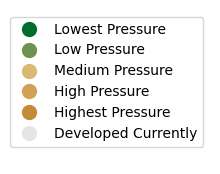

In [113]:
fig,ax=plt.subplots(figsize=(2,2))
l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#e5e5e5', marker='o',markersize=12, label='Developed Currently')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#006d2c', marker='o',markersize=12, label='Lowest Pressure')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#6d934f', marker='o',markersize=12, label='Low Pressure')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#dab972', marker='o',markersize=12, label='Medium Pressure')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#cfa255', marker='o',markersize=12, label='High Pressure')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#c48a38', marker='o',markersize=12, label='Highest Pressure')
ax.axis('off')
ax.legend(handles=[l2,l3,l4,l5,l6,l1])
fig.savefig('Output Maps/NELF pressure Legend.png',dpi=300,transparent=True,bbox_inches='tight')

<IPython.core.display.HTML object>

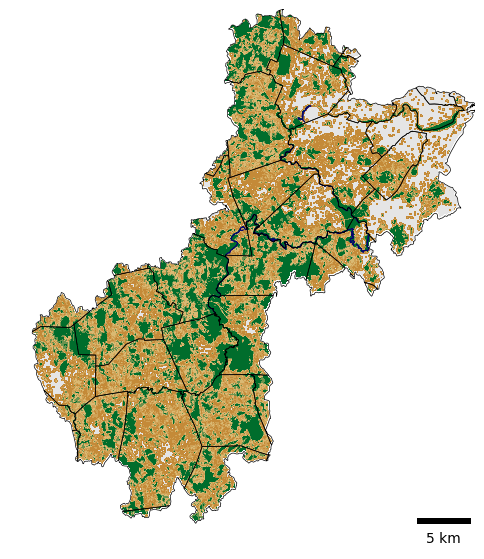

In [116]:
fig,ax=plt.subplots(figsize=(6,8))
show(dPressure,ax=ax,cmap=my_cmap2,extent=plot_extent)
show(iDevelop,ax=ax,cmap=my_cmap,extent=plot_extent)
ax.set_title('')
ax.axis('off')
l1 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#e5e5e5', marker='o',markersize=12, label='Developed Currently')
l2 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#006d2c', marker='o',markersize=12, label='Lowest Pressure')
l3 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#6d934f', marker='o',markersize=12, label='Low Pressure')
l4 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#dab972', marker='o',markersize=12, label='Medium Pressure')
l5 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#cfa255', marker='o',markersize=12, label='High Pressure')
l6 = mpl.lines.Line2D([], [], color=(1,1,1,0),markerfacecolor='#c48a38', marker='o',markersize=12, label='Highest Pressure')

#ax.legend(handles=[l2,l3,l4,l5,l6,l1],loc='upper left')
towns.to_crs(epsg=26986).boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.clip(CRW_Middle).to_crs(epsg=26986).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.add_artist(ScaleBar(1,'m',location='lower right'))
fig.savefig('Output Maps/Development pressure summary for publication.png',dpi=300,bbox_inches='tight',transparent=True)

<IPython.core.display.HTML object>

NameError: name 'CC60' is not defined

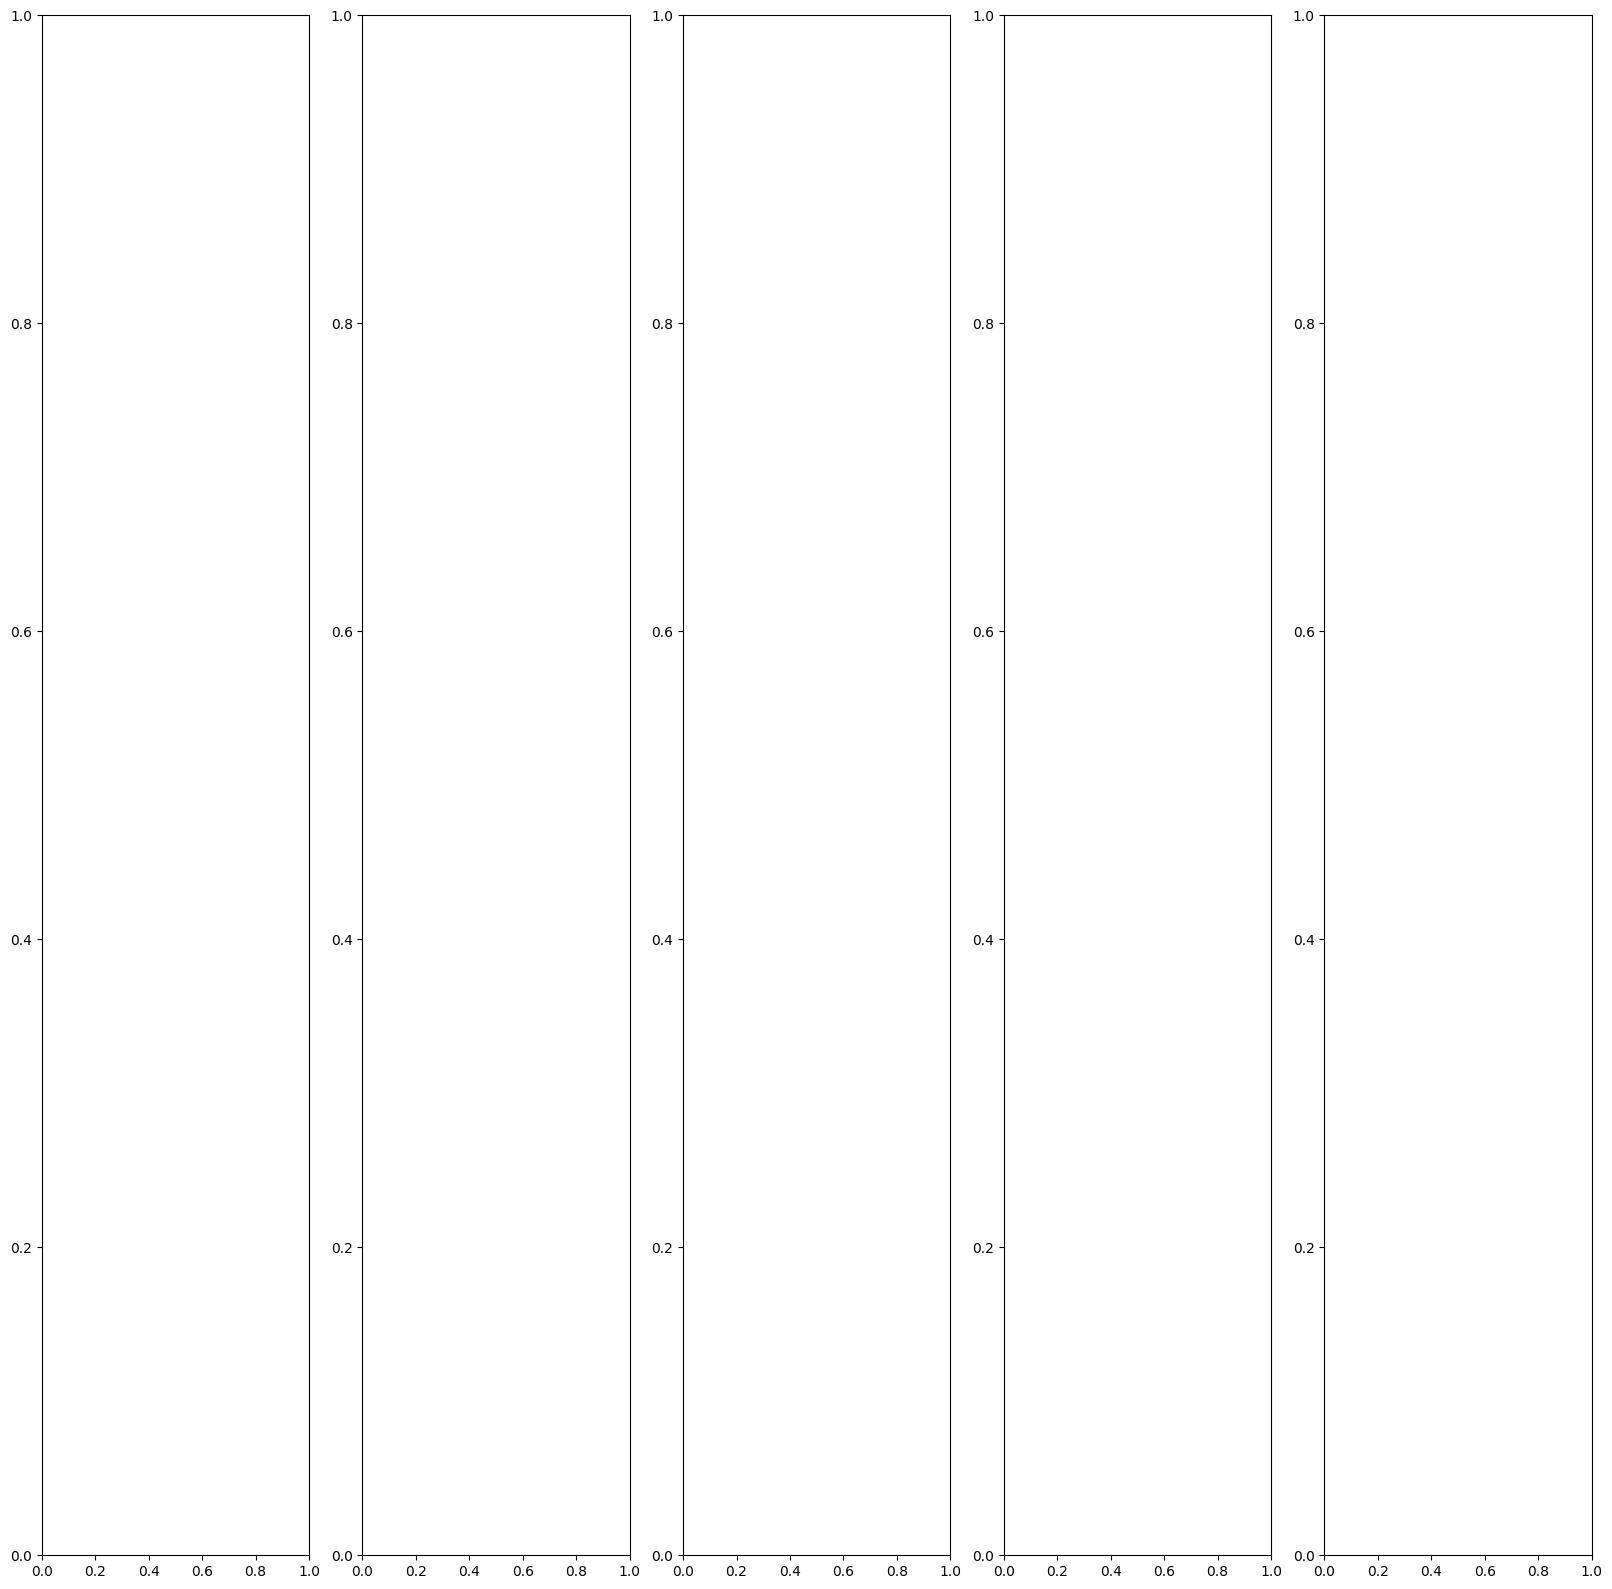

In [83]:
fig, ax=plt.subplots(1,5,figsize=(20,20))
titles=['Connected Communities','Go it Alone','Growing Global','Recent Trends','Yankee Cosmopolitan']
show(CC60,ax=ax[0],cmap=NELF_cmap,vmin=1,vmax=7)
show(GA60,ax=ax[1],cmap=NELF_cmap,vmin=1,vmax=7)
show(GG60,ax=ax[2],cmap=NELF_cmap,vmin=1,vmax=7)
show(RT60,ax=ax[3],cmap=NELF_cmap,vmin=1,vmax=7)
show(YC60,ax=ax[4],cmap=NELF_cmap,vmin=1,vmax=7)
for i in [0,1,2,3,4]:
    ax[i].set_axis_off()
    cbar=fig.colorbar(ax[i].imshow(CC[0,:,:],cmap=NELF_cmap),ax=ax[i],orientation='horizontal',pad=0.03,shrink=0.7)
    cbar.set_ticks(ticks=[1,2,3,4,5,6,7], labels=['High Density Development','Low Density Development','Unprotected Forest','Conserved Forest',
                                                  'Agriculture','Other','Water'], rotation=90,fontsize='x-small')
    ax[i].set_title(titles[i],fontsize='x-large')
plt.savefig('Output Maps/NELF 2060.png',dpi=300,bbox_inches='tight')

In [ ]:

fig, ax=plt.subplots(1,5,figsize=(20,20))
titles=['Connected Communities','Go it Alone','Growing Global','Recent Trends','Yankee Cosmopolitan']
show(CC20,ax=ax[0],cmap=NELF_cmap,vmin=1,vmax=7)
show(GA20,ax=ax[1],cmap=NELF_cmap,vmin=1,vmax=7)
show(GG20,ax=ax[2],cmap=NELF_cmap,vmin=1,vmax=7)
show(RT20,ax=ax[3],cmap=NELF_cmap,vmin=1,vmax=7)
show(YC20,ax=ax[4],cmap=NELF_cmap,vmin=1,vmax=7)
for i in [0,1,2,3,4]:
    ax[i].set_axis_off()
    cbar=fig.colorbar(ax[i].imshow(CC[0,:,:],cmap=NELF_cmap),ax=ax[i],orientation='horizontal',pad=0.03,shrink=0.7)
    cbar.set_ticks(ticks=[1,2,3,4,5,6,7], labels=['High Density Development','Low Density Development','Unprotected Forest','Conserved Forest',
                                                  'Agriculture','Other','Water'], rotation=90,fontsize='x-small')
    ax[i].set_title(titles[i],fontsize='x-large')
plt.savefig('Output Maps/NELF 2020.png',dpi=300,bbox_inches='tight')

In [ ]:
RT20=rioxarray.open_rasterio("../../Raw_Data/NELF/rt_01.tif",masked=True)
RT20=RT20.rio.clip(CRW.to_crs(epsg=5070).geometry)
CC20=rioxarray.open_rasterio("../../Raw_Data/NELF/cc_01.tif",masked=True)
CC20=CC20.rio.clip(CRW.to_crs(epsg=5070).geometry)
GA20=rioxarray.open_rasterio("../../Raw_Data/NELF/ga_01.tif",masked=True)
GA20=GA20.rio.clip(CRW.to_crs(epsg=5070).geometry)
GG20=rioxarray.open_rasterio("../../Raw_Data/NELF/gg_01.tif",masked=True)
GG20=GG20.rio.clip(CRW.to_crs(epsg=5070).geometry)
YC20=rioxarray.open_rasterio("../../Raw_Data/NELF/yc_01.tif",masked=True)
YC20=YC20.rio.clip(CRW.to_crs(epsg=5070).geometry)
RT60=rioxarray.open_rasterio("../../Raw_Data/NELF/rt_05.tif",masked=True)
RT60=RT60.rio.clip(CRW.to_crs(epsg=5070).geometry)
CC60=rioxarray.open_rasterio("../../Raw_Data/NELF/cc_05.tif",masked=True)
CC60=CC60.rio.clip(CRW.to_crs(epsg=5070).geometry)
GA60=rioxarray.open_rasterio("../../Raw_Data/NELF/ga_05.tif",masked=True)
GA60=GA60.rio.clip(CRW.to_crs(epsg=5070).geometry)
GG60=rioxarray.open_rasterio("../../Raw_Data/NELF/gg_05.tif",masked=True)
GG60=GG60.rio.clip(CRW.to_crs(epsg=5070).geometry)
YC60=rioxarray.open_rasterio("../../Raw_Data/NELF/yc_05.tif",masked=True)
YC60=YC60.rio.clip(CRW.to_crs(epsg=5070).geometry)

In [ ]:
labels=['HDD','LDD','UF','CF','A','Other','Water','Total']
unique, count = np.unique(RT20.to_numpy(), return_counts = True)
RT20_Stats=pd.DataFrame({'Value':labels,'RT20':count})
unique, count = np.unique(CC20.to_numpy(), return_counts = True)
CC20_Stats=pd.DataFrame({'CC20':count})
unique, count = np.unique(GA20.to_numpy(), return_counts = True)
GA20_Stats=pd.DataFrame({'GA20':count})
unique, count = np.unique(GG20.to_numpy(), return_counts = True)
GG20_Stats=pd.DataFrame({'GG20':count})
unique, count = np.unique(YC20.to_numpy(), return_counts = True)
YC20_Stats=pd.DataFrame({'YC20':count})
unique, count = np.unique(RT60.to_numpy(), return_counts = True)
RT60_Stats=pd.DataFrame({'RT60':count})
unique, count = np.unique(CC60.to_numpy(), return_counts = True)
CC60_Stats=pd.DataFrame({'CC60':count})
unique, count = np.unique(GA60.to_numpy(), return_counts = True)
GA60_Stats=pd.DataFrame({'GA60':count})
unique, count = np.unique(GG60.to_numpy(), return_counts = True)
GG60_Stats=pd.DataFrame({'GG60':count})
unique, count = np.unique(YC60.to_numpy(), return_counts = True)
YC60_Stats=pd.DataFrame({'YC60':count})
NELF_Stats=pd.concat([RT20_Stats,CC20_Stats,GA20_Stats,GG20_Stats,YC20_Stats,RT60_Stats,CC60_Stats,GA60_Stats,GG60_Stats,YC60_Stats],axis=1)
NELF_Stats=NELF_Stats.iloc[:5,:]
NELF_Stats['Recent Trends']=(NELF_Stats['RT60']-NELF_Stats['RT20'])*900*0.00024711
NELF_Stats['Connected Communities']=900*(NELF_Stats['CC60']-NELF_Stats['CC20'])*0.00024711
NELF_Stats['Go It Alone']=900*(NELF_Stats['GA60']-NELF_Stats['GA20'])*0.00024711
NELF_Stats['Growing Global']=900*(NELF_Stats['GG60']-NELF_Stats['GG20'])*0.00024711
NELF_Stats['Yankee Cosmopolitan']=900*(NELF_Stats['YC60']-NELF_Stats['YC20'])*0.00024711
NELF_Stats=NELF_Stats.drop(['RT20','CC20','GA20','GG20','YC20','RT60','CC60','GA60','GG60','YC60'],axis=1).melt(id_vars=['Value'],var_name='Scenario')

In [ ]:
g=sns.catplot(NELF_Stats,x='Value',y='value',col='Scenario',kind='bar',hue='Value',palette=['#730000','#E60000','#ABCD66','#5C8944','#F5F57A'],aspect=0.65)
axes = g.axes.flatten()
axes[0].set_ylabel("Change in area 2020-2060 (acres)")
for i in np.arange(0,5):
    axes[i].set_xlabel('Land Use Category')
axes[0].text(-1,-90000,'Land Use Category abbreviations\nHDD: high density development\nLDD: low density development\nUF: unprotected forest\nCF: conserved forest\nA: agriculture')
axes[0].text(5,-70000,'Source: New England Landscape Futures and Harvard Forest')
axes[0].text(5,-90000,'Each scenario pressuposes different combinations of connectedness and natural resource innovation\nwhile Recent Trends is the status quo. Connected Communities assumes local\nconnectedness with high innovation, Go It Alone assumes local connectedness with low innovation,\nGrowing Global assumes globalization with low innovation, and Yankee Cosmopolitan assumes\nglobal connectedness with high innovation. Read more at https://harvardforest.fas.harvard.edu/other-tags/future-scenarios.')
plt.savefig('Output Maps/Change Graphs.png',dpi=300,bbox_inches='tight')

In [ ]:
RT2020.plot()
plt.show()

In [ ]:
fig,ax=plt.subplots()
hidden=ax.imshow(summ[0,:,:],cmap='Greys')
show(summ,cmap='Reds',ax=ax)
ax.imshow((RT2020<=2)[0,:,:],cmap='Greys')
fig.colorbar(hidden)
plt.show()

# UMASS CAPS Data

<IPython.core.display.HTML object>

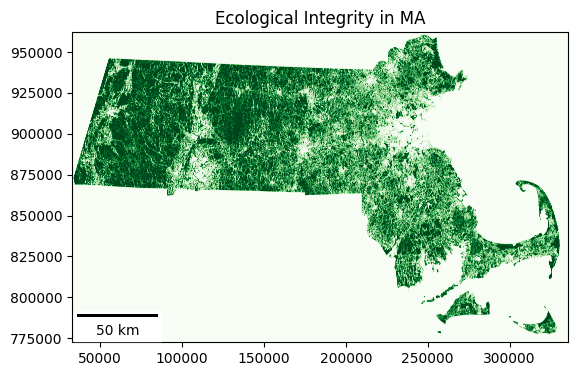

In [250]:
#Open and visualize caps data for whole state
UMASS = rio.open('../../Raw_Data/standard/standard/iei.tif').read(1)
plot_extent = rio.plot.plotting_extent(rio.open('../../Raw_Data/standard/standard/iei.tif'))
f, ax =plt.subplots()

show(UMASS,ax=ax,cmap='Greens',extent=plot_extent)

ax.set(title='Ecological Integrity in MA')
ax.add_artist(ScaleBar(1,location='lower left'))
plt.show()

In [ ]:
CRW.plot()

In [ ]:
CRW.total_bounds

In [294]:
colors7=['#f7fcf5','#9bb686','#498643','#006d2c','#006d2c','#006d2c']
my_greens2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap7',colors7,N=10)

<IPython.core.display.HTML object>

In [277]:
CAPS=rioxarray.open_rasterio('../../Raw_Data/standard/standard/iei.tif',masked=True)
CAPS.name='INT_Rating'
CAPS=CAPS.rio.clip(CRW.to_crs(epsg=26986).geometry)
CAPS_gdf=vectorize(CAPS)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

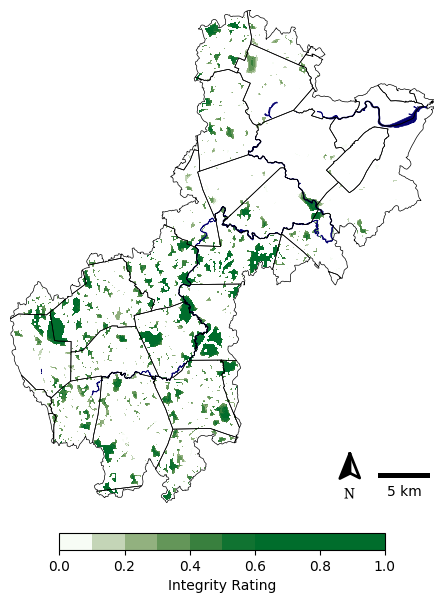

In [295]:
# Just for CRW
UMASS,trans=mask(rio.open('../../Raw_Data/standard/standard/iei.tif'),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
f, ax =plt.subplots(figsize=(6,8))
hidden=ax.imshow(UMASS[0,:,:],cmap=my_greens2,extent=[195915.05,236893.2,863926.13,911511.69],vmin=0,vmax=1)
#ax.set(title='Ecological Integrity in the Watershed')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.axis('off')
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
show(UMASS,cmap=my_greens2,ax=ax,extent=[195915.05,236893.2,863926.13,911511.69],vmin=0,vmax=1)
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
f.colorbar(hidden,label='Integrity Rating',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05)
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.8,text_scaler=3, text_yT=-3)
#ax.text(194900,859000,'Source: UMASS CAPS Data (https://umasscaps.org/)')
f.savefig('Output Maps/CAPS Ecological Integrity for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
help(geocube)

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
CAPS_gdf[CAPS_gdf['INT_Rating']>0.6].plot(ax=ax,color='#ff9101')
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
#plt.title('Hydric Soil Rating')
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
ax.axis('off')
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
fig.savefig('Output Maps/Top 40 CAPS sites for publication.png',transparent=True,dpi=300,bbox_inches='tight')

# Impervious Cover

In [ ]:
NLCD2019_imp=ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019').clip(Charles).select('impervious').reproject(crs='EPSG:26986',scale=30)
imp2019=geemap.ee_export_image(
    NLCD2019_imp, filename='../../Working_Data/imp2019.tif', region=Charles.geometry(), file_per_band=False
)

In [ ]:
NLCD2021_imp=ee.Image('USGS/NLCD_RELEASES/2021_REL/NLCD/2021').clip(Charles).select('impervious').reproject(crs='EPSG:26986',scale=30)
imp2021=geemap.ee_export_image(
    NLCD2021_imp, filename='../../Working_Data/imp2021.tif', region=Charles.geometry(), file_per_band=False
)

In [ ]:
f, ax =plt.subplots(nrows=1, ncols=3,figsize=(10,10))
f.tight_layout()

plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/imp2019.tif'))
imp2019,trans=mask(rio.open('../../Working_Data/imp2019.tif'),CRW.to_crs(epsg=26986).geometry,crop=True)
hidden = ax[0].imshow(imp2019[0,:,:],cmap='Greys',extent=plot_extent)

# Add data and layers
show(imp2019,cmap='Greys',ax=ax[0],extent=plot_extent)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[0], color='gray',linewidth=1)

# Add colorbar using hidden version of raster
f.colorbar(hidden,ax=ax[0],cmap='Greys',orientation='horizontal',aspect=25,shrink=0.7,pad=.04,label='Impervious Cover',format="%4i%%")

# Set properties of plot
ax[0].set(title='Impervious cover (2019)')
ax[0].add_artist(ScaleBar(1,location='lower right'))
ax[0].set_axis_off()


plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/imp2021.tif'))
imp2021,trans=mask(rio.open('../../Working_Data/imp2021.tif'),CRW.to_crs(epsg=26986).geometry,crop=True)
hidden = ax[1].imshow(imp2021[0,:,:],cmap='Greys',extent=plot_extent)

# Add data and layers
show(imp2021,cmap='Greys',ax=ax[1],extent=plot_extent)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[1], color='gray',linewidth=1)

# Add colorbar using hidden version of raster
f.colorbar(hidden,ax=ax[1],cmap='Greys',orientation='horizontal',aspect=25,shrink=0.7,pad=.04,label='Impervious Cover',format="%4i%%")

# Set properties of plot
ax[1].set(title='Impervious cover (2021)')
ax[1].add_artist(ScaleBar(1,location='lower right'))
ax[1].set_axis_off()

hidden = ax[2].imshow(imp2021[0,:,:]-imp2019[0,:,:],cmap='Oranges',extent=plot_extent,vmin=0,vmax=60)

# Add data and layers
show(imp2021-imp2019,cmap='Oranges',ax=ax[2],extent=plot_extent,vmin=0,vmax=60)
towns.to_crs(epsg=26986).boundary.plot(ax=ax[2], color='gray',linewidth=1)

# Add colorbar using hidden version of raster
f.colorbar(hidden,ax=ax[2],cmap='Oranges',orientation='horizontal',aspect=25,shrink=0.7,pad=.04,label='Impervious Cover',format="%4i%%")

# Set properties of plot
ax[2].set(title='Change')
ax[2].add_artist(ScaleBar(1,location='lower right'))
ax[2].set_axis_off()

ax[0].text(195000,845000,'Source: National Land Cover Database (NLCD)')
f.savefig('Output Maps/Impervious Cover 2019 and 2021.png',dpi=300,bbox_inches='tight')

# Heat

In [ ]:
heat,trans=mask(rio.open("../../Raw_Data/Heat/LST_index_normwater_mapc.tif"),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
heat_M,trans=mask(rio.open("../../Raw_Data/Heat/LST_index_normwater_mapc.tif"),CRW_Middle.to_crs(epsg=26986).geometry,crop=True,filled=False)

In [ ]:
pd.DataFrame(rasterstats.zonal_stats(CRW, "../../Raw_Data/Heat/LST_index_normwater_mapc.tif",stats="count min mean max median"),index=CRW.index)

In [ ]:
heat=(100*heat-.14119)/0.943675
heat_M=(100*heat_M-.14119)/0.943675

In [ ]:
codes3=[1,2]
colors3=['#a6cee3','#f5f5f5','#FF9101']
my_cmap3 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap3', colors3)

In [ ]:
ax=CRW_Middle.boundary.plot(figsize=(6,8),color='black',linewidth=0.5)
Charles.clip(CRW_Middle).to_crs(epsg=26986).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
hidden=ax.imshow(heat_M[0,:,:],cmap=my_cmap3,vmin=0,vmax=100)
show(heat_M,cmap=my_cmap3,ax=ax,extent=Middle_extent,vmin=0,vmax=100)
#plt.colorbar(hidden,orientation='vertical',shrink=0.5,aspect=10,pad=0.1,label='Percentile',format='%ith')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.axis('off')
plt.savefig('Output Maps/Heat Ranking wLegend.png',transparent=True,dpi=300,bbox_inches='tight')

In [117]:
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )

<IPython.core.display.HTML object>

In [118]:
def CharClip(image):
    return image.clip(geemap.geopandas_to_ee(CRW))

<IPython.core.display.HTML object>

In [119]:
#Cloud mask function
def mask_l8_clouds(image):
    qa = image.select('QA_PIXEL')
    bit_mask = 1 << 1
    bit_mask1 = 1 << 2
    bit_mask2 = 1 << 3
    bit_mask3 = 1 << 4
    bit_mask4 = 1 << 5
    bit_mask5 = 1 << 7
    mask = (
        qa.bitwiseAnd(bit_mask)
        .eq(0)
        .And(qa.bitwiseAnd(bit_mask1).eq(0))
        .And(qa.bitwiseAnd(bit_mask2).eq(0))
        .And(qa.bitwiseAnd(bit_mask3).eq(0))
        .And(qa.bitwiseAnd(bit_mask4).eq(0))
        .And(qa.bitwiseAnd(bit_mask5).eq(0))
    )
    return image.updateMask(mask)

<IPython.core.display.HTML object>

In [120]:
L8=ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").map(mask_l8_clouds).map(apply_scale_factors).filterBounds(geemap.geopandas_to_ee(CRW)).map(CharClip).select('ST_B10').filter(ee.Filter.calendarRange(6, 8, 'month'))

<IPython.core.display.HTML object>

In [121]:
year='2016'
img=L8.filterDate(year+'-01-01',year+'-12-31').mean().reproject(crs='EPSG:26986',scale=30)
m=geemapf.Map()
m.set_center(-71,42,10)
m.add_layer(img,vis_params={'palette':'Oranges'})
m

<IPython.core.display.HTML object>

<geemap.foliumap.Map object at 0x000001B6FFD818D0>

In [122]:
img=L8.filterDate('2019-01-01','2023-12-31').mean().reproject(crs='EPSG:26986',scale=30)
geemap.ee_export_image(img,filename='../../Working_Data/JulyLST2019_2023.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

<IPython.core.display.HTML object>

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2019_2023.tif


In [154]:
for year in ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']:
    img=L8.filterDate(year+'-01-01',year+'-12-31').mean().reproject(crs='EPSG:26986',scale=30)
    geemap.ee_export_image(img,filename='../../Working_Data/JulyLST'+year+'.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

<IPython.core.display.HTML object>

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2014.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2015.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2016.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2017.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2018.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2019.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2020.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Chad\Desktop\CRWA Project\Working_Data\JulyLST2021.tif
Generating URL ...
Please wait ...
Data downloaded to C:

In [123]:
Kelvin_2023,trans=mask(rio.open("../../Working_Data/JulyLST2019_2023.tif"),CRW.to_crs(epsg=26986).geometry,crop=True,filled=False)
plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/JulyLST2023.tif'))
heat_2023=((Kelvin_2023 - 273.15) * 1.8) + 32

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

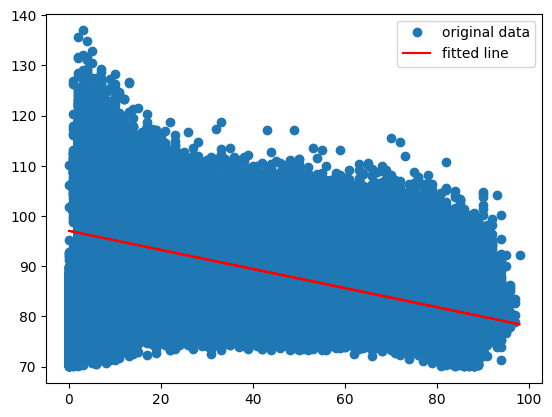

In [232]:
trees=np.ravel(TCC2021[(heat_2023>70) & (heat_2023<200)].data)
heat=np.ravel(heat_2023[(heat_2023>70) & (heat_2023<200)].data)
results=scipy.stats.linregress(trees,heat)
plt.plot(trees, heat, 'o', label='original data')
plt.plot(trees, results.intercept + results.slope*trees, 'r', label='fitted line')
plt.legend()
plt.show()

<IPython.core.display.HTML object>

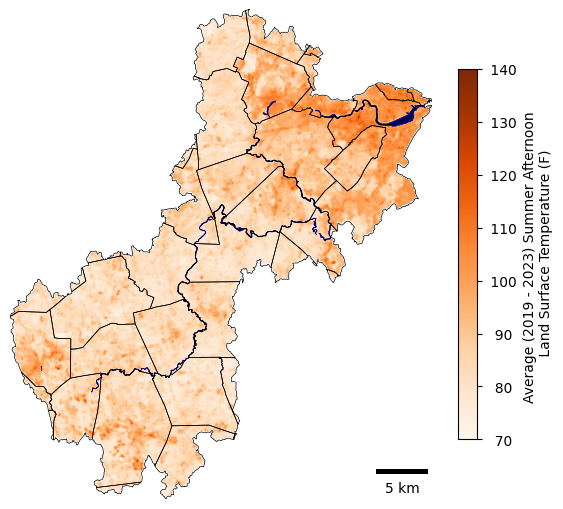

In [129]:
# Create subplots
f, ax = plt.subplots(figsize=(6,8))
f.tight_layout()

# Create hidden version of raster to be used for color bar
hidden = ax.imshow(heat_2023[0,:,:],cmap='Oranges',extent=plot_extent,alpha=1,vmin=70,vmax=140)

# Add data and layers
show(heat_2023,cmap='Oranges',ax=ax,extent=plot_extent,alpha=1,vmin=70,vmax=140)
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)

# Add colorbar using hidden version of raster
#f.colorbar(hidden, cmap='Oranges',orientation='horizontal',shrink=0.7,aspect=20,pad=0.05,label='Average (2019 - 2023) Summer Afternoon \n Land Surface Temperature (F)',format="%4i")

# Set properties of plot
#ax[0].set(title='Tree Cover Change (2008 - 2021) in the Charles River Watershed')
ax.add_artist(ScaleBar(1,location='lower right'))
ax.set_axis_off()
#add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.95,xlim_pos=0.95,text_scaler=4, text_yT=-3)
f.savefig('Output Maps/heat v2.png',transparent=True,dpi=300,bbox_inches='tight')

# Combined Sewer Outflows

In [ ]:
layers = fiona.listlayers('../../Raw_Data/CSO/CSO_exportApril2024.gdb')
for layer in layers:
    CSO = gpd.read_file('../../Raw_Data/CSO/CSO_exportApril2024.gdb',layer=layer).to_crs(epsg=26986).clip(CRW)

In [ ]:
fig,ax=plt.subplots(figsize=(20,20))
CSO.plot(ax=ax)
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
ax.axis('off')
fig.savefig('Output Maps/CSO all.png')

# Open Space

In [130]:
OS = gpd.read_file('../../Raw_Data/OpenSpace/OPENSPACE_POLY.shp',driver='pyogrio').clip(CRW)

<IPython.core.display.HTML object>

## Level of Protection

In [23]:
LOP_recode={
    'P': 'A',
    'T': 'B',
    'L': 'C',
    'N': 'D',
    'X': 'E'
}
OS['LOP_Recode']=OS['LEV_PROT'].map(LOP_recode)

LOP_palette = {'A':'#238b45','B':'#74c476','C':'#c7e9c0','D':'#9B4832','E':'#6E756B'}
LOP_cmap = mpl.colors.ListedColormap([LOP_palette[b] for b in ['A','B','C','D','E']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

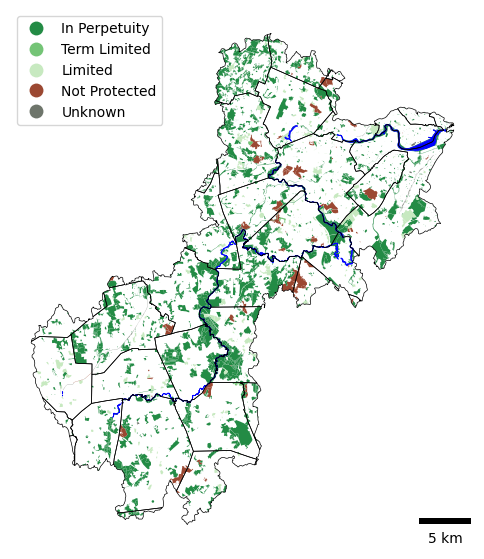

In [36]:
fig,ax=plt.subplots(figsize=(6,8))
OS.plot(ax=ax,column='LOP_Recode',legend=True,cmap=LOP_cmap,legend_kwds={'loc':'upper left'})
leg1 = ax.get_legend()
new_legtxt = ['In Perpetuity','Term Limited','Limited','Not Protected','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
fig.savefig('Output Maps/Open Space Protection for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [35]:
LOP=OS.dissolve('LEV_PROT')[['geometry']]
(LOP.geometry.area*2.47105381/10000)/(LOP.geometry.area*2.47105381/10000).sum()*100

<IPython.core.display.HTML object>


LEV_PROT
L     9.940619
N     8.320464
P    80.971617
T     0.301471
X     0.465830
dtype: float64

In [37]:
(LOP.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


LEV_PROT
L     4500.793891
N     3767.239772
P    36661.355796
T      136.496247
X      210.912959
dtype: float64

In [39]:
LOPStats=pd.DataFrame(rasterstats.zonal_stats(LOP, "../../Working_Data/TCC2021.tif",stats="mean"),index=LOP.index)
LOPStats['mean']/100*(LOP.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


LEV_PROT
L     2186.407639
N     2046.367136
P    25236.200477
T       80.503649
X       94.745193
dtype: float64

In [40]:
LOPStats['mean']

<IPython.core.display.HTML object>


LEV_PROT
L    48.578266
N    54.320066
P    68.835972
T    58.978654
X    44.921466
Name: mean, dtype: float64

## Primary Purpose

In [ ]:
PP_Recode={
    'R':'A',
    'C':'B',
    'B':'C',
    'H':'D',
    'A':'E',
    'W':'F',
    'F':'G',
    'O':'H',
    'X':'I'
}
OS['PP_Recode']=OS['PRIM_PURP'].map(PP_Recode)

PP_palette = {'A':'#2E6C16','B':'#41BD10','C':'#3E931D','D':'#614B43','E':'#B69E40','F':'#158FB8','G':'#5DE2E7','H':'#7A7A7A','I':'#3A3A3A'}
PP_cmap = mpl.colors.ListedColormap([PP_palette[b] for b in ['A','B','C','D','E','F','G','H','I']])

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
OS.plot(ax=ax,column='PP_Recode',legend=True,cmap=PP_cmap,legend_kwds={'loc':'upper left'})
leg1 = ax.get_legend()
new_legtxt = ['Recreation','Conservation','Recreation/Conservation','Historical','Agriculture','Water Supply','Flood Control','Other','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
fig.savefig('Output Maps/Open Space Primary Purpose.png',transparent=True,dpi=300,bbox_inches='tight')

## Public Access

In [ ]:
PA_recode={
    'Y':'A',
    'L':'B',
    'N':'C',
    'X':'D'
}
OS['PA_Recode']=OS['PUB_ACCESS'].map(PA_recode)

PA_palette = {'A':'mediumseagreen','B':'goldenrod','C':'indianred','D':'#696969'}
PA_cmap = mpl.colors.ListedColormap([PA_palette[b] for b in ['A','B','C','D']])

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
OS.plot(ax=ax,column='PA_Recode',legend=True,cmap=PA_cmap,legend_kwds={'loc':'upper left'})
leg1 = ax.get_legend()
new_legtxt = ['Yes','Limited','No','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
fig.savefig('Output Maps/Open Space Public Access wLegend.png',transparent=True,dpi=300,bbox_inches='tight')

## Ownership

In [131]:
OWN_recode={
    'F':'A',
    'S':'B',
    'M':'C',
    'N':'D',
    'P':'E',
    'B':'F',
    'L':'G',
    'O':'H',
    'X':'I'
}
OS['OWN_Recode']=OS['OWNER_TYPE'].map(OWN_recode)

OWN_palette = {'A':'#003c30','B':'#0e726a','C':'#5bb2a8','D':'#995d13','E':'#cfa155','F':'#238b45','G':'#74c476','H':'#7b7373','I':'#281D19'}
OWN_cmap = mpl.colors.ListedColormap([OWN_palette[b] for b in ['A','B','C','D','E','F','G','H','I']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

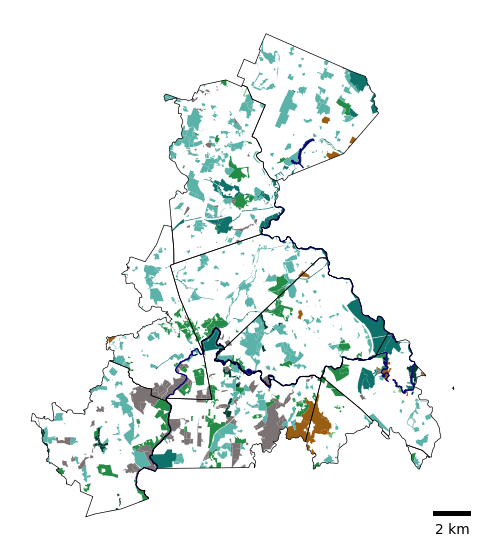

In [132]:
fig,ax=plt.subplots(figsize=(6,8))
OS.clip(CRW_Middle).plot(ax=ax,column='OWN_Recode',legend=False,cmap=OWN_cmap,legend_kwds={'loc':'upper left'})
#leg1 = ax.get_legend()
#new_legtxt = ['Federal','State','Municipal','Private Nonprofit','Private for Profit','Public Nonprofit','Land Trust','Other','Unknown']

#Fixing legend entries
#for ix,eb in enumerate(leg1.get_texts()):
#    eb.set_text(new_legtxt[ix])
ax.axis('off')

ax.add_artist(ScaleBar(1,location='lower right'))
CRW_Middle.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.clip(CRW_Middle).plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
fig.savefig('Output Maps/Open Space Ownership for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
OS.plot(ax=ax,column='OWN_Recode',legend=True,cmap=OWN_cmap,legend_kwds={'loc':'upper left'})
leg1 = ax.get_legend()
new_legtxt = ['Federal','State','Municipal','Private Nonprofit','Private for Profit','Public Nonprofit','Land Trust','Other','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')

ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
fig.savefig('Output Maps/Open Space Ownership for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [ ]:
# area in square meters converted to acres
OS.dissolve('OWN_Recode')['geometry'].area*2.47105381/10000

In [ ]:
(OS.dissolve('OWN_Recode')['geometry'].area*2.47105381/10000)/sum(OS.dissolve('OWN_Recode')['geometry'].area*2.47105381/10000)*100

In [ ]:
OSStats=pd.DataFrame(rasterstats.zonal_stats(OS.dissolve('OWN_Recode'), "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=OS.dissolve('OWN_Recode').index)
OSStats['mean']*OS.dissolve('OWN_Recode')['geometry'].area*2.47105381/10000*(1/100)

In [ ]:
OSStats['mean']

## Statistics

In [ ]:
LOP_zones=OS.dissolve(by='LEV_PROT')[['geometry']]
LOP_stats=pd.DataFrame(rasterstats.zonal_stats(LOP_zones, "../../Working_Data/TCC"+'2008'+".tif",stats="count min mean max median"),index=LOP_zones.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(LOP_zones, "../../Working_Data/TCC"+year+".tif",stats="count min mean max median"),index=LOP_zones.index)
    LOP_stats=LOP_stats.join(stats,on=LOP_zones.index,rsuffix=year)
LOP_stats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/Canopy by Level of Protection.csv')

In [ ]:
LOPData=pd.read_csv('../../Working_Data/Canopy by Level of Protection.csv')
LOPData=pd.melt(LOPData,id_vars='LEV_PROT',var_name='Year')
for i in LOPData.index:
    LOPData['Year'].iloc[i]=LOPData['Year'].iloc[i][-4:]
LOPData['LOP_Recode']=LOPData['LEV_PROT'].map(LOP_recode)
LOPData=LOPData.sort_values(['LOP_Recode','Year'])

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
sns.lineplot(LOPData,x='Year',y='value',hue='LOP_Recode',ax=ax,legend=True,palette={'A':'#238b45','B':'#74c476','C':'#c7e9c0','D':'#9B4832','E':'#6E756B'})
ax.set_ylabel('Canopy Coverage (%)')
ax.set_xlabel('Year')

leg1 = ax.get_legend()
new_legtxt = ['In Perpetuity','Term Limited','Limited','Not Protected','Unknown']
leg1.set_title('')
plt.xticks(rotation=45)

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.savefig('Output Maps/Canopy time series by Level of Protection.png',dpi=300,transparent=True,bbox_inches='tight')

# Parcel Data

In [172]:
# I clipped this in ArcGIS because was so large and had to combine east and west
Parcels=gpd.read_file('../../Working_Data/ParcelsClipped_fromstate.shp',driver='pyogrio')

<IPython.core.display.HTML object>

In [173]:
codes=Parcels.USE_CODE.unique()
codes=codes[codes != np.array(None)]
codes.sort()
np.savetxt("../../Working_Data/ParcelsUseCodes.csv", codes,fmt='%s', delimiter=",")
#https://www.mass.gov/doc/property-type-classification-codes-non-arms-length-codes-and-sales-report-spreadsheet/download

<IPython.core.display.HTML object>

In [174]:
public=pd.read_csv('../../Working_Data/ParcelsUseCodes_CONVERTER.csv')

<IPython.core.display.HTML object>

In [175]:
Parcels_wPublic=Parcels.merge(public, on='USE_CODE')

<IPython.core.display.HTML object>

In [176]:
bad_geos_indexes=Parcels_wPublic[~Parcels_wPublic.geometry.is_valid].index
for i in bad_geos_indexes:
    Parcels_wPublic.geometry[i]=shapely.validation.make_valid(Parcels_wPublic.geometry[i])

<IPython.core.display.HTML object>

C:\Users\Chad\AppData\Local\Temp\ipykernel_7560\1767920085.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Parcels_wPublic.geometry[i]=shapely.validation.make_valid(Parcels_wPublic.geometry[i])
C:\Users\Chad\AppData\Local\Temp\ipykernel_

In [177]:
Parcels_dissolved=Parcels_wPublic.dissolve('Public',as_index=False)

<IPython.core.display.HTML object>

In [181]:
Parcels_dissolved.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    132976.104477
1     45635.367539
2      4147.561731
dtype: float64

In [182]:
Parcels_dissolved

<IPython.core.display.HTML object>

Public                                           geometry  MAP_PAR_ID  \
0      R  MULTIPOLYGON (((197211.525 876285.300, 197223....     52-C-37   
1      U  MULTIPOLYGON (((200144.565 870324.176, 200228....  0504042000   
2      X  MULTIPOLYGON (((204761.972 865103.940, 204758....      52-G-2   

             LOC_ID POLY_TYPE MAP_NO  SOURCE     PLAN_ID  LAST_EDIT BND_CHK  \
0  F_763187_2965339       FEE     52  ASSESS    983/2017   20120527      NR   
1  F_764428_2953007       FEE      5  ASSESS       SITED   20191107      OK   
2  F_763075_2965214       FEE     52  ASSESS  BIKE TRAIL   20120527      OK   

   ... BLD_AREA  UNITS RES_AREA          STYLE  NUM_ROOMS  LOT_UNITS  STORIES  \
0  ...     2072      0      997       Fam Conv          7      Acres        2   
1  ...     9428      0     7528  DORMITORY  bd          0      Acres        4   
2  ...     4523      2     2304    Condominium          0      Acres        0   

      SHAPE_Leng  Shape_Le_1  Shape_Area  
0   19884.219455   86.917866  353.636744  
1  205312.529714   92.079093  304.323634  
2   19884.219455   65.505039  266.894902  

[3 rows x 49 columns]

In [178]:
ParStats=pd.DataFrame(rasterstats.zonal_stats(Parcels_dissolved, "../../Working_Data/TCC2021.tif",stats="count min mean max median"),index=Parcels_dissolved.Public)
ParStats

<IPython.core.display.HTML object>

min   max       mean   count  median
Public                                      
R       1.0  97.0  54.301283  597288    61.0
U       1.0  97.0  59.638088  200955    74.0
X       2.0  95.0  40.010156   18610    32.0

In [179]:
my_palette = {'R':'#ecd8a5','U':'#5bb2a8','X':'#d5d5d5'}
my_cmap10 = mpl.colors.ListedColormap([my_palette[b] for b in ['R','U','X']])

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

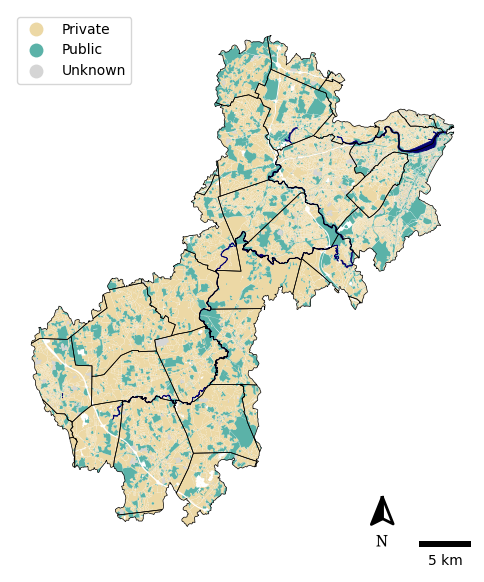

In [249]:
fig,ax=plt.subplots(figsize=(6,8))
Parcels_dissolved.plot(ax=ax,column='Public',cmap=my_cmap10,legend=True,legend_kwds={'loc':'upper left'})
towns.to_crs(epsg=26986).boundary.plot(ax=ax, color='black',linewidth=0.5)
#plt.title('Hydric Soil Rating')
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.add_artist(ScaleBar(1,location='lower right'))
#cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs='epsg:26986')
leg1 = ax.get_legend()
new_legtxt = ['Private','Public','Unknown']

#Fixing legend entries
for ix,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[ix])
ax.axis('off')
add_north_arrow(ax=ax,scale=0.5,ylim_pos=0.05,xlim_pos=0.80,text_scaler=3, text_yT=-3)
#ax.text(194900,859000,'Source: SSURGO data accessed from MassGIS',fontsize=10)
fig.savefig('Output Maps/Parcel public private for publication.png',transparent=True,dpi=300,bbox_inches='tight')

In [186]:
Parcels_towns_dissolved=Parcels_wPublic.dissolve(['Public','TOWN_ID'],as_index=False).sort_values('TOWN_ID')
Parcels_towns_stats=pd.DataFrame(rasterstats.zonal_stats(Parcels_towns_dissolved, "../../Working_Data/TCC2021.tif",stats="mean"),index=Parcels_towns_dissolved.index)

<IPython.core.display.HTML object>

In [187]:
town_dict={
    10: 'Arlington',
    14: 'Ashland',  
    25:'Bellingham',  
    26: 'Belmont',  
    35:'Boston',  
    46:'Brookline',  
    49: 'Cambridge',  
    73:'Dedham',  
    78: 'Dover',  
    99:'Foxborough', 
    101:'Franklin', 
    136: 'Holliston', 
    138: 'Hopedale',
    139:'Hopkinton', 
    155:'Lexington', 
    157:'Lincoln', 
    175:'Medfield', 
    177:'Medway', 
    179:'Mendon', 
    185:'Milford', 
    187:'Millis', 
    198:'Natick', 
    199:'Needham', 
    207:'Newton', 
    208:'Norfolk', 
    269:'Sherborn',
    274:'Somerville', 
    307:'Walpole', 
    308:'Waltham', 
    314:'Watertown', 
    315:'Wayland', 
    317:'Wellesley', 
    333:'Weston', 
    335:'Westwood', 
    350:'Wrentham'
}

<IPython.core.display.HTML object>

In [218]:
Parcels_statsM.sort_values(['TOWN_ID','Public'])

<IPython.core.display.HTML object>

Public    TOWN_ID       mean
7       R     Dedham  51.509452
42      U     Dedham  64.760410
72      X     Dedham  46.135531
8       R      Dover  71.295474
43      U      Dover  73.038697
73      X      Dover  29.615385
21      R     Natick  57.787244
55      U     Natick  58.825540
22      R    Needham  51.515688
56      U    Needham  65.273878
83      X    Needham  43.734118
25      R   Sherborn  66.780864
59      U   Sherborn  71.487193
86      X   Sherborn  20.897638
28      R    Waltham  32.268761
62      U    Waltham  53.624172
88      X    Waltham   8.200000
31      R  Wellesley  56.015921
65      U  Wellesley  59.046006
32      R     Weston  66.946742
66      U     Weston  63.765805
90      X     Weston  59.111888
33      R   Westwood  64.378001
67      U   Westwood  65.303128
91      X   Westwood  50.333333

<IPython.core.display.HTML object>

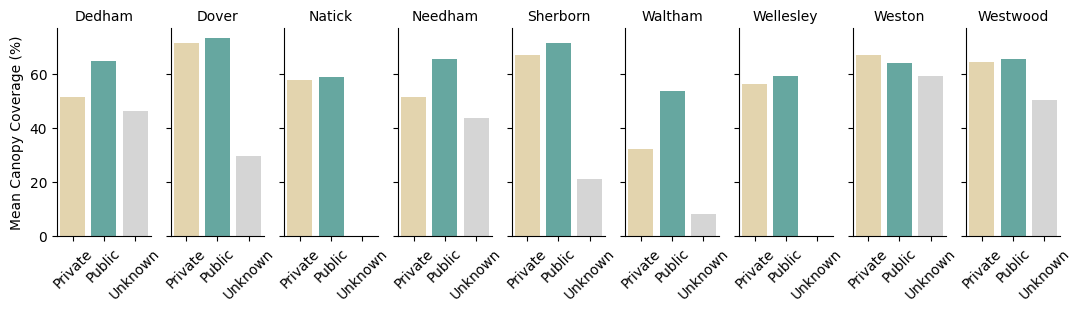

In [219]:
Parcels_statsbytown=Parcels_towns_dissolved.join(Parcels_towns_stats)[['Public','TOWN_ID','mean']]
Parcels_statsbytown=Parcels_statsbytown.replace({"TOWN_ID": town_dict})
Parcels_statsU=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Upper)]
Parcels_statsM=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Middle)]
Parcels_statsL=Parcels_statsbytown[np.isin(Parcels_statsbytown['TOWN_ID'],Lower)]
ax=sns.catplot(
    data=Parcels_statsM.sort_values(['TOWN_ID','Public']), x="Public", y="mean", col="TOWN_ID",
    kind="bar", height=3, aspect=.4,hue='Public',orient='v',palette=my_palette
)
ax.set_titles(col_template="{col_name}")
ax.set(ylabel='Mean Canopy Coverage (%)',xlabel='')
ax.set_xticklabels(labels=['Private','Public','Unknown'],rotation=45)
plt.savefig('Output Maps/Canopy by Town (2021).png',dpi=300,transparent=True,bbox_inches='tight')

In [ ]:
parcels=gpd.read_file('../../Working_Data/Parcels_Clipped.shp',driver='pyogrio')

In [ ]:
parcels.columns

In [ ]:
owners=parcels.owner_name
owners

In [ ]:
def parcelsearch(search):
    return parcels[owners.str.contains(search)==True]

In [ ]:
# https://www.mass.gov/info-details/find-my-electric-gas-and-water-company
# NSTAR
# Medical Area Total Energy? - a powerplant in Longwood
# Alliance Energy LLC? - gas terminals
# Southern Energy Kendall - generator in Kendall Square
# Deveaney Energy Inc - utility in Newton
# ANP Bellingham Energy Company - natural gas plant in Bellingham
# Northeast Energy Assoc - generators in Bellingham

In [ ]:
owners[owners.str.contains('ELECTR')==True]

In [ ]:
eversource=pd.concat([parcelsearch('NSTAR E'),parcelsearch('NSTAR G'),parcels[owners=='NSTAR']]).dissolve()
national=pd.concat([parcelsearch('MASS ELE'),parcelsearch('MASSACHUSETTS ELE')]).dissolve()
electric=pd.concat([eversource,national]).dissolve()

In [ ]:
U_stats=pd.DataFrame(rasterstats.zonal_stats(electric, "../../Working_Data/TCC"+'2008'+".tif",stats="count min mean max median"),index=electric.index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(electric, "../../Working_Data/TCC"+year+".tif",stats="count min mean max median"),index=electric.index)
    U_stats=U_stats.join(stats,on=electric.index,rsuffix=year)
U_stats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/Canopy in electric parcels.csv')

In [ ]:
O_stats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC"+'2008'+".tif",stats="count min mean max median"),index=CRW.dissolve().index)
for year in ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']:
    stats=pd.DataFrame(rasterstats.zonal_stats(CRW.dissolve(), "../../Working_Data/TCC"+year+".tif",stats="count min mean max median"),index=CRW.dissolve().index)
    O_stats=O_stats.join(stats,on=CRW.dissolve().index,rsuffix=year)
O_stats[['mean2008','mean2009','mean2010','mean2011','mean2012','mean2013','mean2014','mean2015','mean2016','mean2017','mean2018','mean2019','mean2020','mean2021']].to_csv('../../Working_Data/Canopy watershed.csv')

In [ ]:
electric=pd.read_csv('../../Working_Data/Canopy in electric parcels.csv')
electric=pd.melt(electric,var_name='Year')
for i in electric.index:
    electric['Year'].iloc[i]=electric['Year'].iloc[i][-4:]
watershed=pd.read_csv('../../Working_Data/Canopy watershed.csv')
watershed=pd.melt(watershed,var_name='Year')
for i in watershed.index:
    watershed['Year'].iloc[i]=watershed['Year'].iloc[i][-4:]

In [ ]:
sns.lineplot(electric[1:],x='Year',y='value',color='yellow')
sns.lineplot(watershed[1:],x='Year',y='value',color='blue')
plt.show()

In [ ]:
# blue=eversource
# orange = cambridge electric
# purple = national grid
fig,ax=plt.subplots(figsize=(6,8))
eversource.plot(ax=ax,color='blue')
parcelsearch('CAMBRIDGE ELECTRIC').plot(ax=ax,color='orange')
national.plot(ax=ax,color='purple')
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
fig.savefig('Output Maps/Utility Land.png',transparent=True,dpi=300, bbox_inches='tight')

In [ ]:
fig,ax=plt.subplots(figsize=(6,8))
parcelsearch('NSTAR').plot(ax=ax)
parcelsearch('ELECTRIC').plot(ax=ax)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
plt.show()

In [ ]:
parcels[parcels.poly_typ!='Boston_poly'].plot(column='poly_typ',legend=True,figsize=(10,10))
plt.savefig('Output Maps/Parcel Data.png',dpi=300,bbox_inches='tight',transparent=True)

# Transmission Lines

In [ ]:
TL=gpd.read_file('../../Raw_Data/Transmission Lines/Electric_Power_Transmission_Lines_A.shp',driver='pyogrio').to_crs(epsg=26986).clip(CRW)
fig,ax=plt.subplots(figsize=(6,8))
TL.plot(ax=ax,column='TYPE',legend=False,cmap='seismic',legend_kwds={'loc':'upper left'})
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Transmission Lines.png',dpi=300,bbox_inches='tight',transparent=True)

# Gas Pipelines

In [ ]:
gas=gpd.read_file('../../Raw_Data/Gas Lines/NaturalGas_InterIntrastate_Pipelines_US_EIA.shp',driver='pyogrio').to_crs(epsg=26986).clip(CRW)
fig,ax=plt.subplots(figsize=(6,8))
gas.plot(ax=ax,color='red')
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='blue',edgecolor='blue',linewidth=0.5)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/Gas Lines.png',dpi=300,bbox_inches='tight',transparent=True)

# Tree Ordinances

In [ ]:
Ords=Charles_Towns.sort_values(by='name')
Ords=Ords.merge(pd.read_csv('../../Raw_Data/Tree Ordinances.csv'),left_on='name',right_on='Municipality')
Ords.plot(column='Tree Ordinance',legend=True)

# TNC Conservation Priority Data

In [ ]:
layers = fiona.listlayers('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb')
habitat=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Category_Habitat')
coastal=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Category_CoastalFlood')
inland=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Category_InlandFlood')
water=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Category_WaterResourceProtection')
A=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Conservation_Priorities_A')
B=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Conservation_Priorities_B')
C=gpd.read_file('../../Raw_Data/TNC_Cons/MA_CharlesRiver_NBS_11.07.2019.gdb',layer='MA_CharlesRiver_Conservation_Priorities_C')

In [ ]:
layers

In [50]:
HP_cons_opps=gpd.read_file('../../Raw_Data/TNC_Cons/High Level Conservation Opp/High Priority Conservation Opportunities/High Priority Conservation Opportunities.shp').to_crs(epsg=26986)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

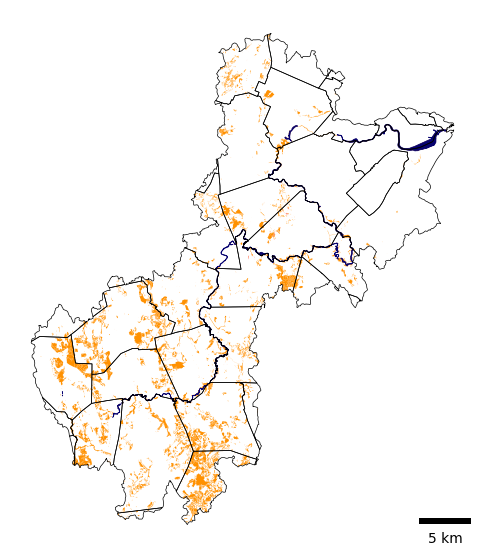

In [52]:
fig,ax=plt.subplots(figsize=(6,8))
HP_cons_opps[HP_cons_opps.Priority=='High Priority'].plot(ax=ax,color='#ff9101')
towns.boundary.plot(ax=ax,color='black',linewidth=0.5)
Charles.plot(ax=ax,color='#060270',edgecolor='#060270',linewidth=0.5)
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
fig.savefig('Output Maps/High Priority Conservation Areas.png',dpi=300,transparent=True,bbox_inches='tight')

In [44]:
HP_cons_opps=HP_cons_opps.dissolve()[['geometry']]
HPCons_stats=pd.DataFrame(rasterstats.zonal_stats(HP_cons_opps, "../../Working_Data/TCC"+'2021'+".tif",stats="count min mean max median"),index=HP_cons_opps.index)
HPCons_stats['mean']/100*(HP_cons_opps.geometry.area*2.47105381/10000)

<IPython.core.display.HTML object>


0    46504.41366
dtype: float64

In [45]:
HPCons_stats['mean']

<IPython.core.display.HTML object>


0    68.885664
Name: mean, dtype: float64

In [47]:
HP_cons_opps.geometry.area*2.47105381/10000

<IPython.core.display.HTML object>


0    67509.567135
dtype: float64

# Land Cover Maps

In [ ]:
# Unzip CRWA files
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Send_CR_LandCover_2021.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Send_CR_LandCover_2021/")
zipfile.ZipFile(r"C:\Users\Chad\Desktop\CRWA Project\Raw_Data\Send_CR_LULC_2021.zip").extractall(path="C:/Users/Chad/Desktop/CRWA Project/Raw_Data/Send_CR_LULC_2021/")

In [ ]:
LC2021=rio.open('../../Raw_Data/Send_CR_LandCover_2021/Send_CR_LandCover_2021/landcover_2021_charlesriver_v4a.tif').read(1)
LULC2021=rio.open('../../Raw_Data/Send_CR_LULC_2021/Send_CR_LULC_2021/landuselandcover_2021_charlesriver_v8a.tif').read(1)

In [ ]:
# Get MASSGIS data and compare to these

In [ ]:
#Forest Areas
NLCD2019lc=ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019').clip(Charles).select('landcover')

In [ ]:
#Impervious Cover
NLCD2019=ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019').clip(Charles).select('impervious')
map_2 = geemapf.Map(center=[42.36565, -71.10832], zoom=9,tiles="cartodb positron")
image_viz_params = {
    'bands': ['impervious'],
    'min': 0,
    'max': 100,
    'palette': 'plasma'
}
map_2.add_layer(NLCD2019, image_viz_params)
map_2

#NLCD data from previous years to see changes

# Climate-driven threats to trees

In [ ]:
# Changes in rainfall, flooding, riparian flooding, temperature ee.ImageCollection("NASA/ORNL/DAYMET_V4")
# Insects and pest pressure https://www.fs.usda.gov/foresthealth/applied-sciences/mapping-reporting/national-risk-maps.shtml
# Shifting of weather data to during flowering (graph of temperature, storms over time (smaller time frame) summarized at the watershed)
# Hemlock wooly adelgate, beech leaf disease, emerald ash borer, oak wilt
# How does climate layer on top of the disease stuff

# Dams

In [ ]:
#https://www.mass.gov/info-details/massgis-data-dams

# EJ

In [ ]:
# MASSGIS EJ pop, Census data, Redlining
# Heat hours https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0224959#pone.0224959.ref015 or https://climate-vulnerability.mapc.org/
# NASA Appears LST monthly averages!

# FEMA flood zones

In [ ]:
# https://www.mass.gov/info-details/massgis-data-fema-national-flood-hazard-layer

# AF TES

In [ ]:
# https://www.treeequityscore.org/map#8.58/42.24/-71.4325

# Towns

In [ ]:
#https://www.mass.gov/info-details/massgis-data-municipalities

# Invasive Species Data Collection

In [ ]:
#Extract Sentinel 2 bands and indices of interest
def extractBandsIndices(image):
    return image.select(['B2','B3','B4','B5_10m','B6_10m','B7_10m','B8','B8A_10m','B11_10m','B12_10m',
                         'NDVI','NBR','SAVI','RENDVI','EVI'])

In [ ]:
#Resample Sentinel 2 bands to 10 m
def resample10m(image):
    proj_10m=image.select('B4').projection()
    B5_res=image.select('B5').resample('bicubic').reproject(proj_10m).rename('B5_10m')
    B6_res=image.select('B6').resample('bicubic').reproject(proj_10m).rename('B6_10m')
    B7_res=image.select('B7').resample('bicubic').reproject(proj_10m).rename('B7_10m')
    B8A_res=image.select('B8A').resample('bicubic').reproject(proj_10m).rename('B8A_10m')
    B11_res=image.select('B11').resample('bicubic').reproject(proj_10m).rename('B11_10m')
    B12_res=image.select('B12').resample('bicubic').reproject(proj_10m).rename('B12_10m')
    return image.addBands([B5_res,B6_res,B7_res,B8A_res,B11_res,B12_res])

In [ ]:
#Add 5 vegetation indices of interest
def addIndices(image):
    NDVI = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    NBR = image.normalizedDifference(['B12_10m','B8']).rename('NBR')
    SAVI = image.expression(
        '1.5 * ((NIR - RED)) / (NIR + RED + 0.5)', {
            'NIR' : image.select('B8'),
            'RED' : image.select('B4'),
        }).rename('SAVI')
    RENDVI = image.normalizedDifference(['B6_10m','B5_10m']).rename('RENDVI')
    EVI = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
            'NIR' : image.select('B8'),
            'RED' : image.select('B4'),
            'BLUE': image.select('B2')}).rename('EVI')
    return image.addBands([NDVI,NBR,SAVI,RENDVI,EVI])

In [ ]:
#Cloud mask function
def mask_s2_clouds(image):
    qa = image.select('QA60')
    cloud_bit_mask = 1 << 10
    cirrus_bit_mask = 1 << 11
    mask = (
        qa.bitwiseAnd(cloud_bit_mask)
        .eq(0)
        .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
    )
    return image.updateMask(mask).divide(10000)

In [ ]:
#Land cover mask function
def mask_forests(image):
    mask=(NLCD2019lc.eq(41).Or(NLCD2019lc.eq(42).Or(NLCD2019lc.eq(43))))
    return image.updateMask(mask)

In [ ]:
#Pre-processing sentinel-2 data
S2_All=ee.ImageCollection(("COPERNICUS/S2_SR_HARMONIZED")).map(mask_s2_clouds).filterBounds(Charles.geometry()).map(Charclip).map(resample10m).map(addIndices).map(extractBandsIndices)

In [ ]:
S2_All.size()

In [ ]:
S2_All_list=S2_All.toList(S2_All.size())

In [ ]:
#Map of first image in collection
map_3 = geemapf.Map(center=[42.36565, -71.10832], zoom=9,tiles="cartodb positron")
map_3.add_layer(ee.Image(S2_All_list.get(1)).visualize(bands=['B4','B3','B2'],max=0.2))
map_3

In [ ]:
NDVI=S2_All.select('NDVI')

In [ ]:
NDVI_list=NDVI.toList(NDVI.size())

In [ ]:
map_4 = geemapf.Map(center=[42.36565, -71.10832], zoom=9,tiles="cartodb positron")
map_4.add_layer(ee.Image(NDVI_list.get(1)))
map_4

# Scratch workspace

In [ ]:
#Forest Areas
NLCD2019lc=ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019').clip(Charles).select('landcover')
map_1 = geemapf.Map(center=[42.36565, -71.10832], zoom=9,tiles="cartodb positron")
map_1.add_layer(NLCD2019lc.updateMask(NLCD2019lc.eq(41)),name='Deciduous Forest',color='light green')
map_1.add_layer(NLCD2019lc.updateMask(NLCD2019lc.eq(42)),name='Evergreen Forest',color='dark green')
map_1.add_layer(NLCD2019lc.updateMask(NLCD2019lc.eq(43)),name='Mixed Forest',color='green')
map_1

#NLCD change maps for forest types, check out different times
#Add boundary to map

In [ ]:
# Create HTML map of each year for the forest cover data
for i in range(2000,2021):
    year=i
    image=ee.ImageCollection('MODIS/006/MOD44B').filterDate(str(i)+'-01-01',str(i+1)+'-01-01').map(Charclip)
    image_viz_params = {
        'bands': ['Percent_Tree_Cover'],
        'min': 0,
        'max': 100,
        'palette': 'Greens'
    }
    map_1 = geemapf.Map(center=[42.36565, -71.10832], zoom=9,tiles="cartodb positron")
    map_1.add_layer(image, image_viz_params)
    legend_keys=['0%','25%','50%','75%','100%']
    map_1.add_legend('Percent_Tree_Cover',legend_keys,["#f7fcf5","#c7e9c0","#74c476","#238b45","#00441b"])
    map_1
    map_1.save('TreeCoverMaps\Tree Cover '+str(i)+'.html')



In [ ]:
#Extracting Charles River Watershed Boundary
CRW_ = gpd.read_file("..\Raw_Data\watshd\watshdp1.shp")
CRW = CRW_[CRW_.NAME=="CHARLES"]
CRW.plot()

In [ ]:
#List of invasive species of interest
# Japanese knotweed, Asian bittersweet, glossy buckthorn, euonymous, multiflora rose, cork tree, kudzu, porcelain berry
# https://www.massaudubon.org/nature-wildlife/invasive-plants-in-massachusetts
def get_obs(years,taxon_id):
  response=pyinaturalist.v1.observations.get_observations(year=years,taxon_id=taxon_id,geo=True,page='all',place_id=2)
  my_observations = pyinaturalist.Observation.from_json_list(response)
  df = pd.DataFrame(
      [
          {
              'latitude': o.location[0],
              'longitude': o.location[1],
              'date': o.observed_on.isoformat()
          }
          for o in my_observations
          if o.location
      ]
  )
  gdf = gpd.GeoDataFrame(
      df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
  )
  return gdf

In [ ]:
# https://nbviewer.org/gist/perrygeo/c426355e40037c452434
def density_heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.gaussian_filter(logheatmap, smoothing, mode='nearest')

    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:

years=[2020,2021,2022,2023,2024]
knotweed=914922
bittersweet=64540
buckthorn=55972
euonymus=117433
multiflora=78882
corktree=166636
porcelain=204237
kudzu=62671
barberry=58727

knot_gdf=get_obs(years,knotweed)
bitt_gdf=get_obs(years,bittersweet)
buck_gdf=get_obs(years,buckthorn)
euon_gdf=get_obs(years,euonymus)
mult_gdf=get_obs(years,multiflora)
cork_gdf=get_obs(years,corktree)
porc_gdf=get_obs(years,porcelain)
kudz_gdf=get_obs(years,kudzu)
barb_gdf=get_obs(years,barberry)

In [ ]:
d={
  'Knotweed':knot_gdf,
  'Bittersweet':bitt_gdf,
  'Buckthorn':buck_gdf,
  'Euonymus':euon_gdf,
  'Multiflora':mult_gdf,
  'Corktree':cork_gdf,
  'Porcelain Berry':porc_gdf,
  'Kudzu':kudz_gdf,
  'Barberry':barb_gdf
}
for name, value in d.items():
  ax = Charles_lower_gdf.to_crs(epsg=3857).boundary.plot(figsize=(10,10), color='blue',linewidth=0.5)
  Charles_upper_gdf.to_crs(epsg=3857).boundary.plot(ax=ax,figsize=(10,10), color='green',linewidth=0.5)
  value.clip(Charles_gdf).to_crs(epsg=3857).plot(ax=ax)
  plt.title(name+" (2020 - 2024)")
  cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
  ax.set_axis_off()
  ax.add_artist(ScaleBar(1,location='lower right'))
  plt.savefig(name+'.png')

In [ ]:
#Create function to clip image to be used for clipping image collections
def Charclip(image):
    return image.clip(Charles)

In [ ]:
#Import and clip MODIS VCF data to Charles and animate
treeData=ee.ImageCollection('MODIS/006/MOD44B').filterBounds(Charles.geometry()).select('Percent_Tree_Cover').map(Charclip)
videoArgs = {
  'dimensions': 768,
  'region': Charles.geometry(),
  'framesPerSecond': 1,
  'crs': 'EPSG:3857',
  'min': 0,
  'max': 100,
  'palette': ["#f7fcf5","#c7e9c0","#74c476","#238b45","#00441b"],
  'format':'gif'
}

In [ ]:
#Obtain link to animation
urllib.request.urlretrieve(treeData.getVideoThumbURL(videoArgs),'../../Working_Data/treeCoverNoLabels.gif')
geemap.add_text_to_gif('../../Working_Data/treeCoverNoLabels.gif','treeCover.gif',text_sequence=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],font_color='white')

In [ ]:
#HUC codes from https://apps.nationalmap.gov/viewer/
Charles=ee.FeatureCollection("USGS/WBD/2017/HUC10").filter("huc10 == '0109000107' or huc10 == '0109000106'")
Charles_lower=ee.FeatureCollection("USGS/WBD/2017/HUC10").filter("huc10 == '0109000107'")
Charles_upper=ee.FeatureCollection("USGS/WBD/2017/HUC10").filter("huc10 == '0109000106'")

In [ ]:
#Convert earth engine feature collections to geopandas data frames
Charles_gdf = ee.data.computeFeatures({
    'expression': Charles,
    'fileFormat': 'GEOPANDAS_GEODATAFRAME'
})
Charles_gdf.crs = 'EPSG:4326'

Charles_lower_gdf = ee.data.computeFeatures({
    'expression': Charles_lower,
    'fileFormat': 'GEOPANDAS_GEODATAFRAME'
})
Charles_lower_gdf.crs = 'EPSG:4326'

Charles_upper_gdf = ee.data.computeFeatures({
    'expression': Charles_upper,
    'fileFormat': 'GEOPANDAS_GEODATAFRAME'
})
Charles_upper_gdf.crs = 'EPSG:4326'

In [ ]:
ax = Charles_lower_gdf.to_crs(epsg=3857).boundary.plot(figsize=(10,10), color='blue',linewidth=0.5)
Charles_upper_gdf.to_crs(epsg=3857).boundary.plot(ax=ax,figsize=(10,10), color='green',linewidth=0.5)
plt.title("Map of the Charles River Watershed")
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.add_artist(ScaleBar(1,location='lower right'))
plt.savefig("Charles River Watershed Overview Map.png")

In [ ]:
# Projected climate impacts
# USDA hardiness zones maps
# Rainfall, drought prediction
# Temperature projections

In [ ]:
#Priority planting recommendations as areas with low canopy that already have permeable areas

In [ ]:
# American Forests tree equity score analyzer
# Message Mushtaaq about why there are gaps in the data

In [ ]:
# South Natick Dam
# Watertown Dam (probably not happening soon)
# https://maps.coastalresilience.org/massachusetts/

In [ ]:
# Calculate and extract raster of tree cover change from 2005 to 2020 from GEE
treeCover2005=ee.Image('MODIS/006/MOD44B/2005_03_06').clip(geemap.geopandas_to_ee(CRW)).select('Percent_Tree_Cover').reproject(crs='EPSG:3857',scale=250)
treeCover2020=ee.Image('MODIS/006/MOD44B/2020_03_05').clip(geemap.geopandas_to_ee(CRW)).select('Percent_Tree_Cover').reproject(crs='EPSG:3857',scale=250)
dtreeCover=treeCover2020.subtract(treeCover2005)
dtreeCover=geemap.ee_export_image(dtreeCover, filename='../../Working_Data/dtreeCover.tif', region=geemap.geopandas_to_ee(CRW).geometry(), file_per_band=False)

In [ ]:
# Mask tree cover change to watershed and obtain its plotting extent to use later for lining up vector data
dtreeCover,trans=mask(rio.open('../../Working_Data/dtreeCover.tif'),CRW.to_crs(epsg=3857).geometry,crop=True)
plot_extent = rio.plot.plotting_extent(rio.open('../../Working_Data/dtreeCover.tif'))